In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_json('patient_data_train.json')
data.head()

,PatientID,Sex,Age,Conditions,Out patient costs
0,100041,M,79,"{'HD': 4, 'HT': 2}","{'2023': 17312, '2022': 16769, '2021': 16226, ..."
1,100179,F,71,"{'DB': 1, 'HD': 1, 'HT': 1}","{'2023': 14028, '2022': 12292, '2021': 10557, ..."
2,100210,F,84,"{'AT': 2, 'DB': 4, 'HD': 4, 'HT': 1}","{'2023': 24653, '2022': 30431, '2021': 31393, ..."
3,100794,M,67,"{'DB': 3, 'HD': 1}",{'2023': 5113}
4,101629,M,72,"{'DB': 1, 'HD': 2, 'HT': 1}","{'2023': 15652, '2022': 14150, '2021': 12376, ..."


In [ ]:
data_flat1 = pd.json_normalize(data['Conditions'])
data_flat2 = pd.json_normalize(data['Out patient costs'])


In [ ]:
patient = pd.concat([data.drop(columns=['Conditions', 'Out patient costs']), data_flat1, data_flat2], axis=1)
patient.head()

,PatientID,Sex,Age,HD,HT,DB,AT,2023,2022,2021,2020,2019
0,100041,M,79,4.0,2.0,NaN,NaN,17312.0,16769.0,16226.0,15522.0,14819.0
1,100179,F,71,1.0,1.0,1.0,NaN,14028.0,12292.0,10557.0,8936.0,7316.0
2,100210,F,84,4.0,1.0,4.0,2.0,24653.0,30431.0,31393.0,32357.0,32206.0
3,100794,M,67,1.0,NaN,3.0,NaN,5113.0,NaN,NaN,NaN,NaN
4,101629,M,72,2.0,1.0,1.0,NaN,15652.0,14150.0,12376.0,10602.0,8982.0


In [ ]:
# setting the index as PatientID and renaming column names

patient = patient.set_index('PatientID')
patient = patient.rename(columns={
    '2023': 'OPC_2023',
    '2022': 'OPC_2022',
    '2021': 'OPC_2021',
    '2020': 'OPC_2020',
    '2019': 'OPC_2019'
})
patient.head()

,Sex,Age,HD,HT,DB,AT,OPC_2023,OPC_2022,OPC_2021,OPC_2020,OPC_2019
PatientID,,,,,,,,,,,
100041,M,79,4.0,2.0,NaN,NaN,17312.0,16769.0,16226.0,15522.0,14819.0
100179,F,71,1.0,1.0,1.0,NaN,14028.0,12292.0,10557.0,8936.0,7316.0
100210,F,84,4.0,1.0,4.0,2.0,24653.0,30431.0,31393.0,32357.0,32206.0
100794,M,67,1.0,NaN,3.0,NaN,5113.0,NaN,NaN,NaN,NaN
101629,M,72,2.0,1.0,1.0,NaN,15652.0,14150.0,12376.0,10602.0,8982.0


In [ ]:
patient_training = pd.read_csv('Patient_trainingdata.csv')
patient_training.head()

,PatientID,TotalClaims
0,100041,28424
1,100179,22212
2,100210,44841
3,100794,16506
4,101629,25796


In [ ]:
print(patient_training.shape)
print(patient.shape)

(14629, 2)
(14629, 11)


In [ ]:
hc_data = pd.merge(patient, patient_training, on='PatientID', how='inner')
hc_data.head()

,PatientID,Sex,Age,HD,HT,DB,AT,OPC_2023,OPC_2022,OPC_2021,OPC_2020,OPC_2019,TotalClaims
0,100041,M,79,4.0,2.0,NaN,NaN,17312.0,16769.0,16226.0,15522.0,14819.0,28424
1,100179,F,71,1.0,1.0,1.0,NaN,14028.0,12292.0,10557.0,8936.0,7316.0,22212
2,100210,F,84,4.0,1.0,4.0,2.0,24653.0,30431.0,31393.0,32357.0,32206.0,44841
3,100794,M,67,1.0,NaN,3.0,NaN,5113.0,NaN,NaN,NaN,NaN,16506
4,101629,M,72,2.0,1.0,1.0,NaN,15652.0,14150.0,12376.0,10602.0,8982.0,25796


In [ ]:
hc = hc_data.set_index('PatientID')


### **Quick Look**

In [ ]:
hc.describe()

,Age,HD,HT,DB,AT,OPC_2023,OPC_2022,OPC_2021,OPC_2020,OPC_2019,TotalClaims
count,14629.000000,9285.000000,9289.000000,9317.000000,9308.000000,13881.000000,13091.000000,12351.000000,11569.000000,10772.000000,14629.000000
mean,75.021054,2.521809,2.504252,2.506494,2.501719,15796.209351,15772.808112,15511.522792,15208.026882,14827.553286,33354.544945
std,5.478084,1.233545,1.227558,1.236471,1.223888,6746.027392,6833.981927,6811.104505,6729.117073,6567.265593,18542.715406
min,66.000000,1.000000,1.000000,1.000000,1.000000,3144.000000,3317.000000,2987.000000,2960.000000,2989.000000,8000.000000
25%,70.000000,1.000000,1.000000,1.000000,1.000000,10784.000000,10661.000000,10413.500000,10165.000000,9861.500000,21838.000000
50%,75.000000,2.000000,2.000000,2.000000,2.000000,15010.000000,15036.000000,14580.000000,14225.000000,13785.500000,29269.000000
75%,80.000000,4.000000,3.000000,3.000000,3.000000,19498.000000,19418.500000,19063.000000,18739.000000,18342.000000,40511.000000
max,84.000000,5.000000,5.000000,5.000000,5.000000,35485.000000,36222.000000,35806.000000,36341.000000,35924.000000,270426.000000


In [ ]:
hc.isnull().sum()

,0
Sex,0
Age,0
HD,5344
HT,5340
DB,5312
AT,5321
OPC_2023,748
OPC_2022,1538
OPC_2021,2278
OPC_2020,3060


In [ ]:
hc = hc.fillna(0) # replacing null values with 0

In [ ]:
numerical_fields = hc.select_dtypes(include=['number']).columns.tolist()
categorical_fields = hc.select_dtypes(include=['object']).columns.tolist()

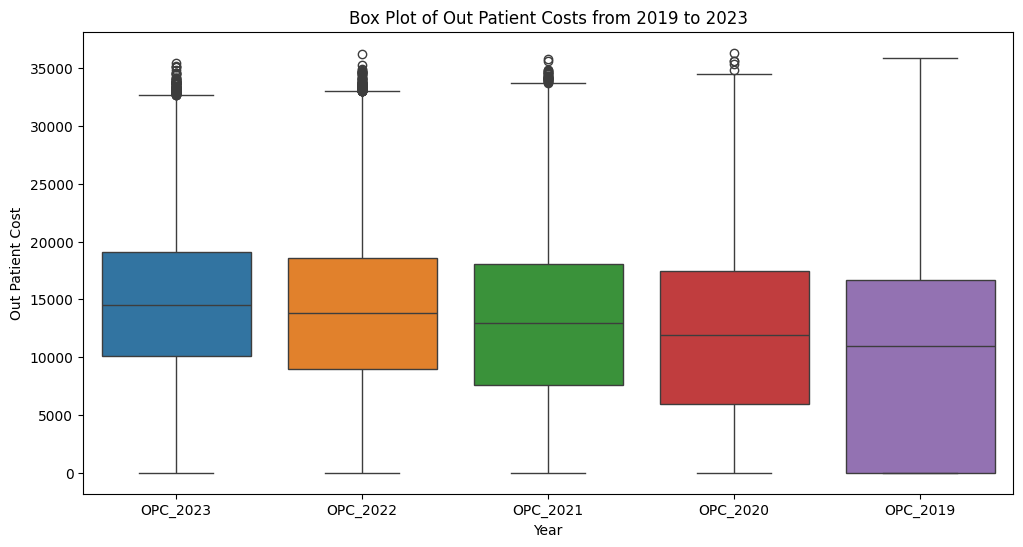

In [ ]:

# box plot for OPC_2023 to OPC_2019
plt.figure(figsize=(12, 6))
sns.boxplot(data=hc[['OPC_2023', 'OPC_2022', 'OPC_2021', 'OPC_2020', 'OPC_2019']])
plt.title('Box Plot of Out Patient Costs from 2019 to 2023')
plt.xlabel('Year')
plt.ylabel('Out Patient Cost')
plt.show()

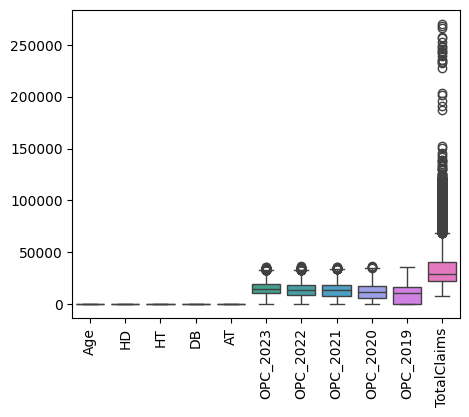

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(hc[numerical_fields])
plt.xticks(rotation=90)
plt.show()

### **Data Exploration**

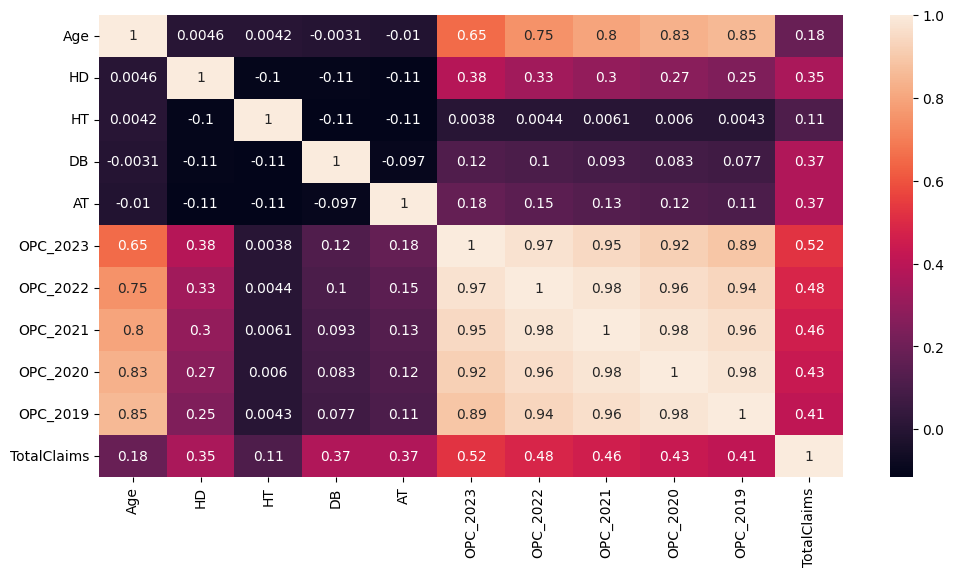

In [ ]:
correlation = hc.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True)
plt.show()


In [ ]:

# Drop the specified columns
#hc = hc.drop(['OPC_2022', 'OPC_2021', 'OPC_2020', 'OPC_2019'], axis=1)

In [ ]:
hc.columns

Index(['Sex', 'Age', 'HD', 'HT', 'DB', 'AT', 'OPC_2023', 'OPC_2022',
       'OPC_2021', 'OPC_2020', 'OPC_2019', 'TotalClaims'],
      dtype='object')

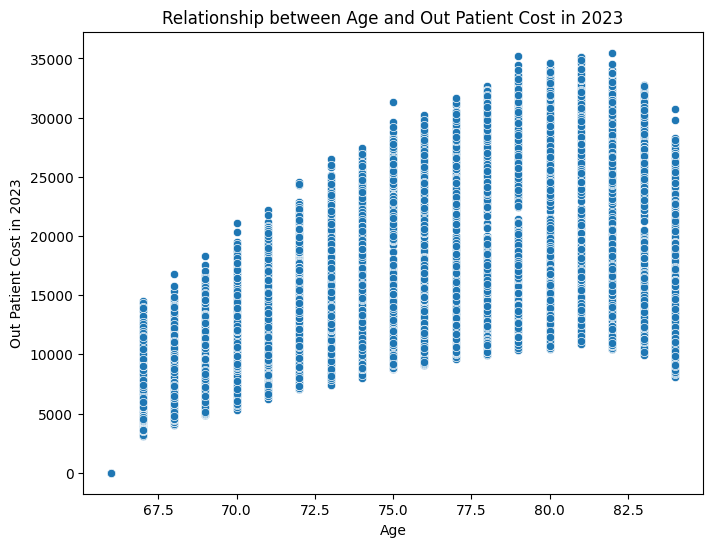

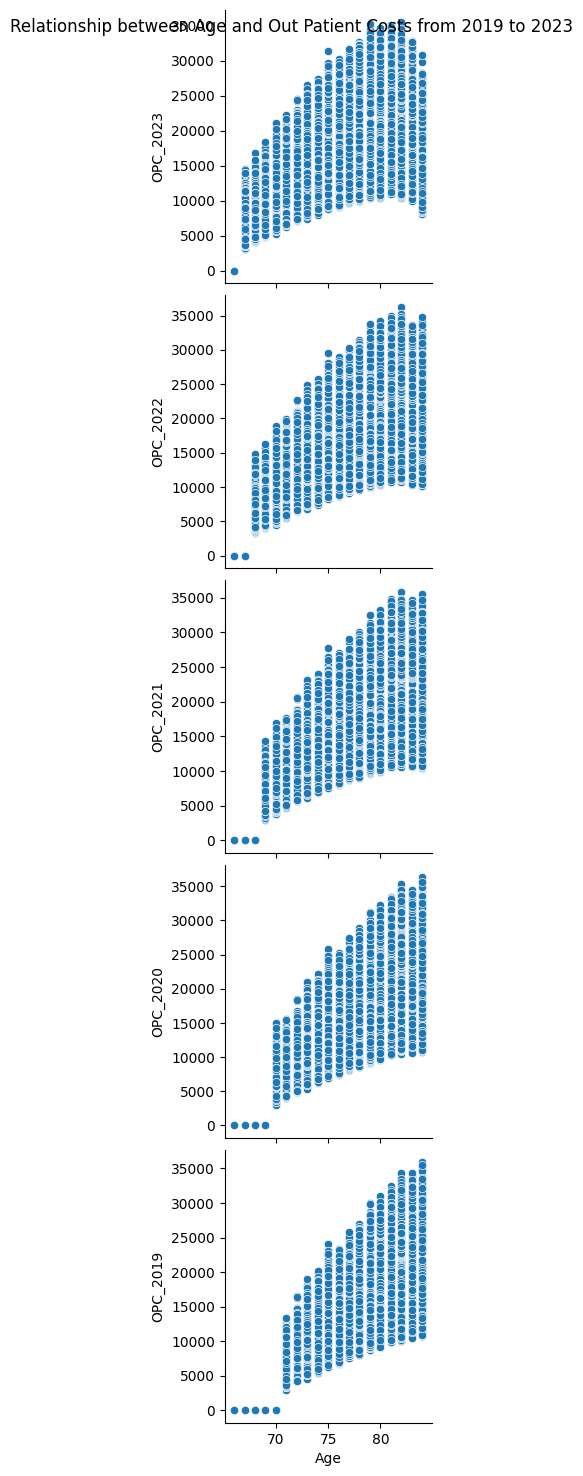

In [ ]:


# scatter plot to show the relationship between age and OPC_2023
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='OPC_2023', data=hc)
plt.title('Relationship between Age and Out Patient Cost in 2023')
plt.xlabel('Age')
plt.ylabel('Out Patient Cost in 2023')
plt.show()

# scatter plot matrix to show the relationship between age and OPC for all years
sns.pairplot(hc, x_vars=['Age'], y_vars=['OPC_2023', 'OPC_2022', 'OPC_2021', 'OPC_2020', 'OPC_2019'], height=3)
plt.suptitle('Relationship between Age and Out Patient Costs from 2019 to 2023')
plt.show()

In [ ]:

# Group by sex and calculate the number of patients and average total claims
patient_stats = hc.groupby('Sex')[['TotalClaims']].agg(['count', 'mean'])

# Flatten the multi-level column index
patient_stats.columns = ['Number of Patients', 'Average Total Claims']

# Display the table
patient_stats

,Number of Patients,Average Total Claims
Sex,,
F,7265,33419.082450
M,7364,33290.875068


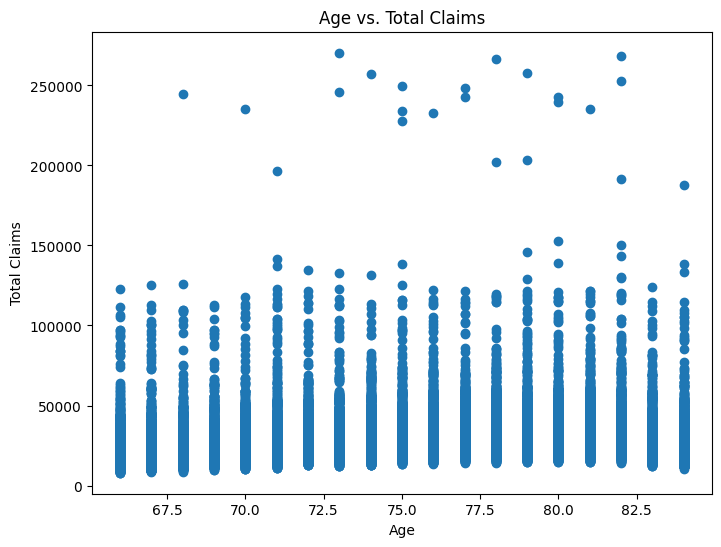

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(hc['Age'], hc['TotalClaims'])
plt.xlabel('Age')
plt.ylabel('Total Claims')
plt.title('Age vs. Total Claims')
plt.show()

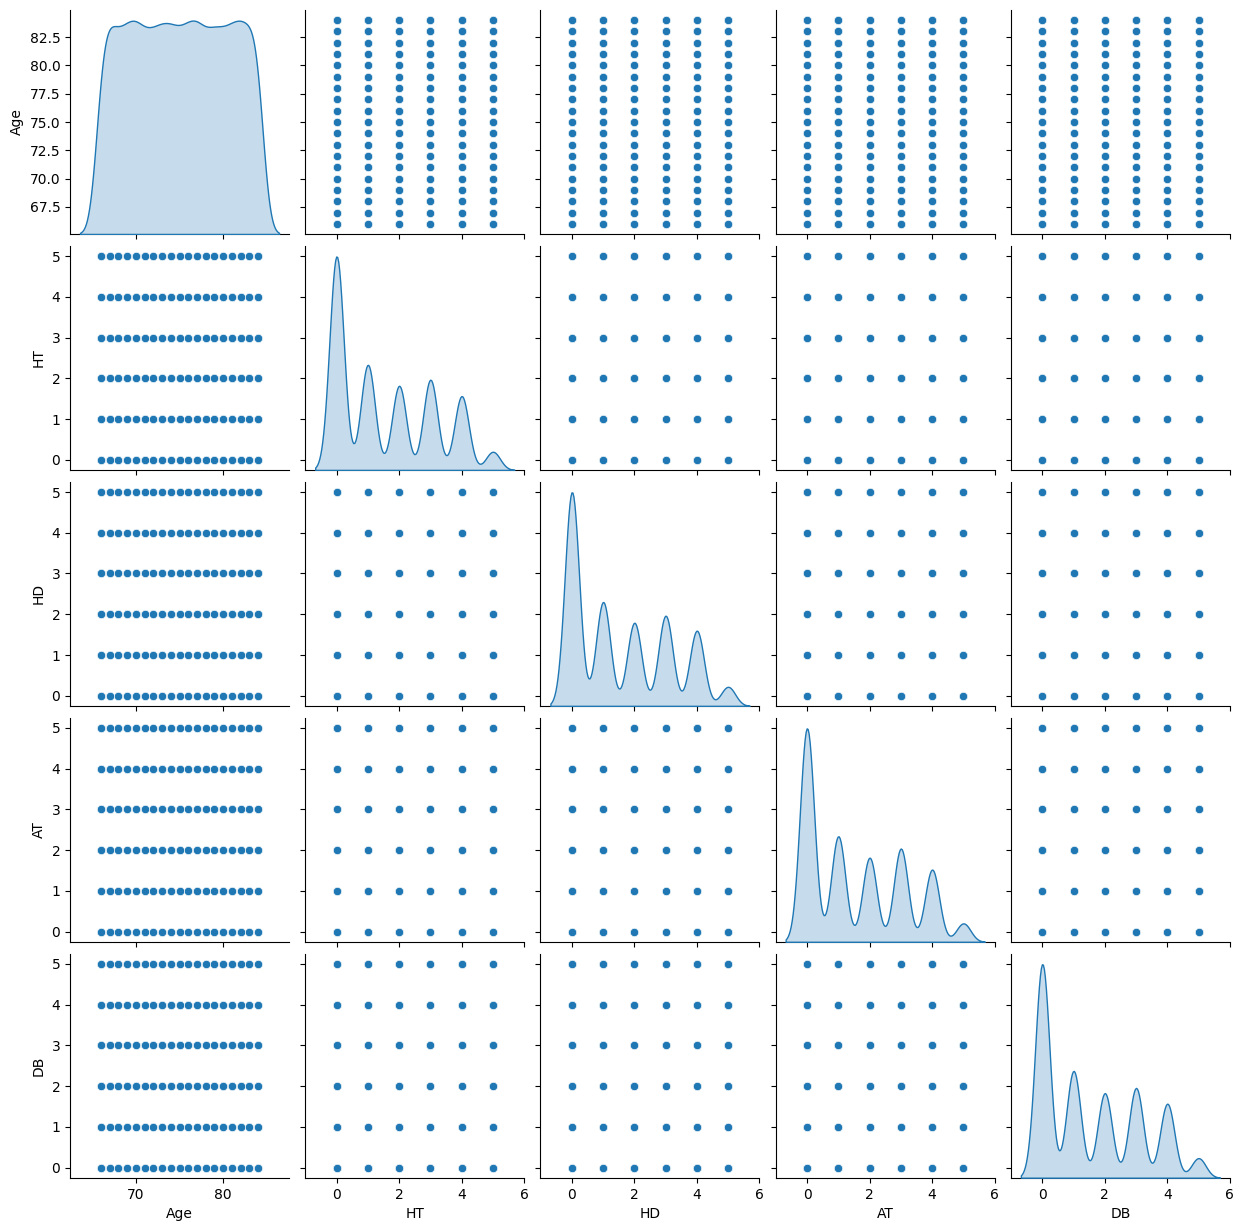

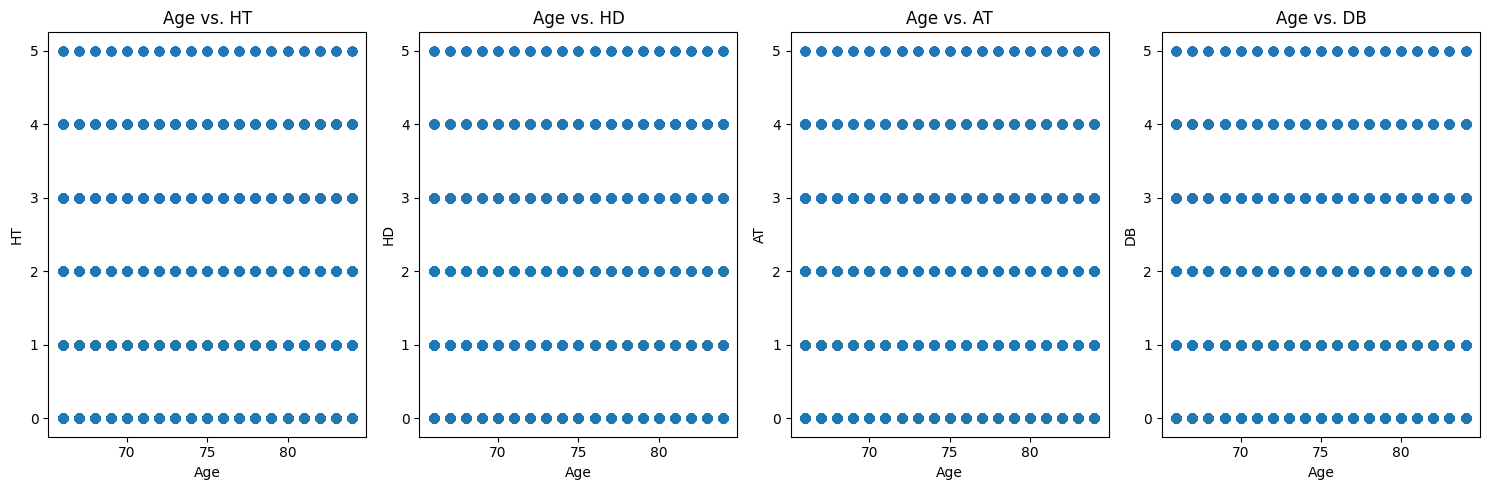

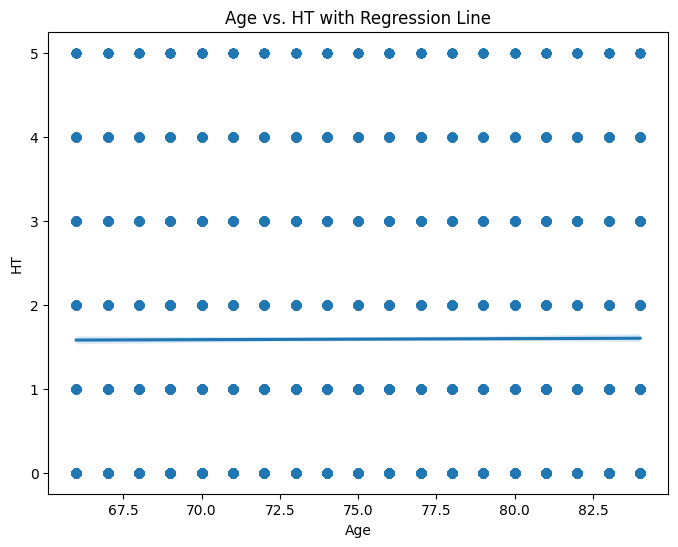

In [ ]:


# scatter plot matrix to visualize relationships between age and ht, hd, at, db
sns.pairplot(hc[['Age', 'HT', 'HD', 'AT', 'DB']], diag_kind='kde')
plt.show()

# individual scatter plots for each variable against age
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(hc['Age'], hc['HT'])
plt.xlabel('Age')
plt.ylabel('HT')
plt.title('Age vs. HT')

plt.subplot(1, 4, 2)
plt.scatter(hc['Age'], hc['HD'])
plt.xlabel('Age')
plt.ylabel('HD')
plt.title('Age vs. HD')

plt.subplot(1, 4, 3)
plt.scatter(hc['Age'], hc['AT'])
plt.xlabel('Age')
plt.ylabel('AT')
plt.title('Age vs. AT')

plt.subplot(1, 4, 4)
plt.scatter(hc['Age'], hc['DB'])
plt.xlabel('Age')
plt.ylabel('DB')
plt.title('Age vs. DB')

plt.tight_layout()
plt.show()

# You can also create separate regression plots to visualize the relationship and potential trends
# for each variable against age using sns.regplot

# Example for Age vs. HT
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='HT', data=hc)
plt.xlabel('Age')
plt.ylabel('HT')
plt.title('Age vs. HT with Regression Line')
plt.show()

In [ ]:


def categorize_age(age):
  """Categorizes age into specified ranges."""
  if age < 66:
    return 'Below 66'
  elif 66 <= age <= 70:
    return '66-70'
  elif 71 <= age <= 75:
    return '71-75'
  elif 76 <= age <= 80:
    return '76-80'
  elif 81 <= age <= 85:
    return '81-85'
  else:
    return 'Above 85'

hc['AgeCategory'] = hc['Age'].apply(categorize_age)

# Now, 'AgeCategory' column will contain the categorized age values
print(hc[['Age', 'AgeCategory']].head())

           Age AgeCategory
PatientID                 
100041      79       76-80
100179      71       71-75
100210      84       81-85
100794      67       66-70
101629      72       71-75


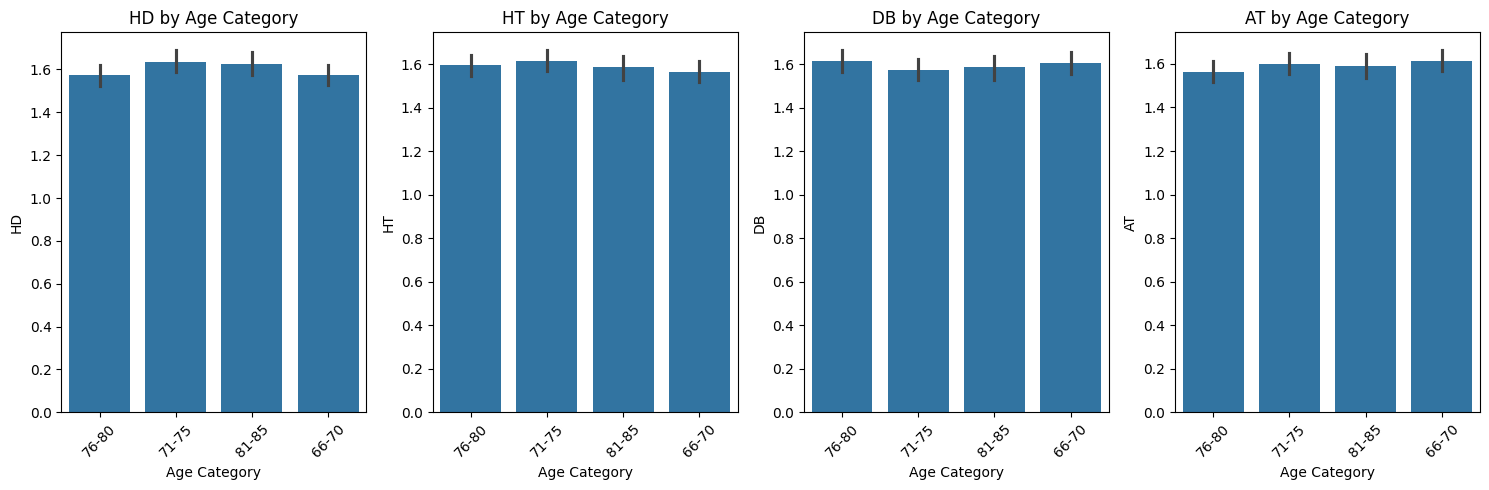

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hc' DataFrame is already created with 'AgeCategory', 'HD', 'HT', 'DB', 'AT' columns

# Create a bar chart for each health indicator by age category
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.barplot(x='AgeCategory', y='HD', data=hc)
plt.xlabel('Age Category')
plt.ylabel('HD')
plt.title('HD by Age Category')
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
sns.barplot(x='AgeCategory', y='HT', data=hc)
plt.xlabel('Age Category')
plt.ylabel('HT')
plt.title('HT by Age Category')
plt.xticks(rotation=45)

plt.subplot(1, 4, 3)
sns.barplot(x='AgeCategory', y='DB', data=hc)
plt.xlabel('Age Category')
plt.ylabel('DB')
plt.title('DB by Age Category')
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
sns.barplot(x='AgeCategory', y='AT', data=hc)
plt.xlabel('Age Category')
plt.ylabel('AT')
plt.title('AT by Age Category')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

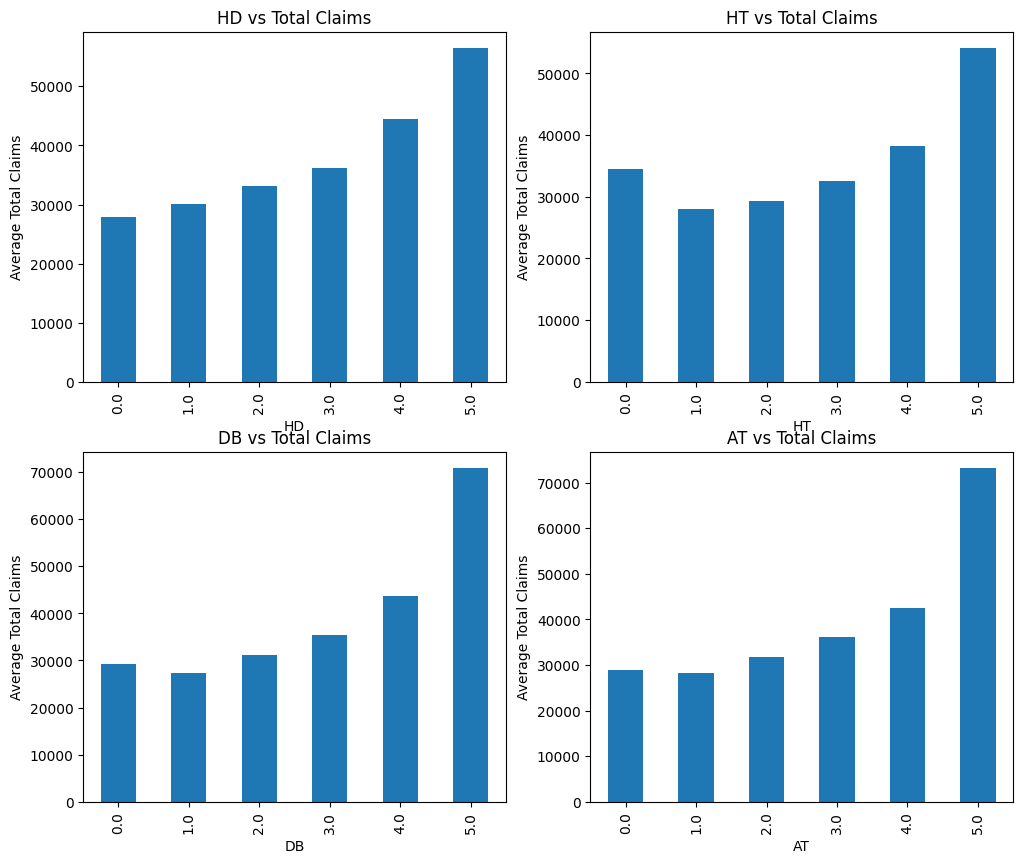

In [ ]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# HD vs TotalClaims
hc.groupby('HD')['TotalClaims'].mean().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('HD vs Total Claims')
axes[0, 0].set_ylabel('Average Total Claims')

# HT vs TotalClaims
hc.groupby('HT')['TotalClaims'].mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('HT vs Total Claims')
axes[0, 1].set_ylabel('Average Total Claims')

# DB vs TotalClaims
hc.groupby('DB')['TotalClaims'].mean().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('DB vs Total Claims')
axes[1, 0].set_ylabel('Average Total Claims')

# AT vs TotalClaims
hc.groupby('AT')['TotalClaims'].mean().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('AT vs Total Claims')
axes[1, 1].set_ylabel('Average Total Claims')


plt.show()


In [ ]:


# Calculate the number of patients with OPC > 0 for each year
num_patients_opc_gt_0 = {
    'OPC_2023': (hc['OPC_2023'] > 0).sum(),
    'OPC_2022': (hc['OPC_2022'] > 0).sum(),
    'OPC_2021': (hc['OPC_2021'] > 0).sum(),
    'OPC_2020': (hc['OPC_2020'] > 0).sum(),
    'OPC_2019': (hc['OPC_2019'] > 0).sum()
}

print("Number of patients with OPC > 0 for each year:")
for year, count in num_patients_opc_gt_0.items():
  print(f"{year}: {count}")

Number of patients with OPC > 0 for each year:
OPC_2023: 13881
OPC_2022: 13091
OPC_2021: 12351
OPC_2020: 11569
OPC_2019: 10772


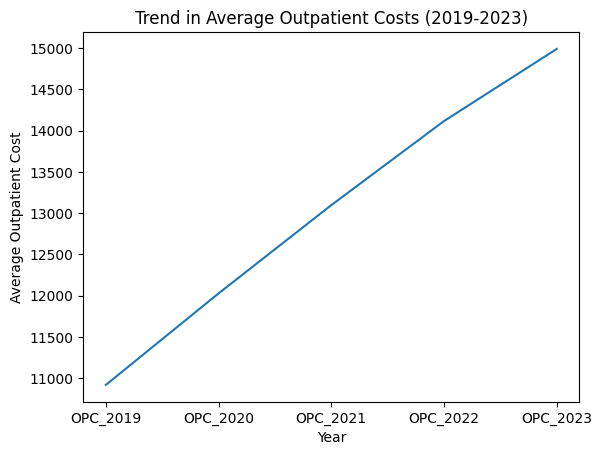

In [ ]:


import matplotlib.pyplot as plt

# Select the columns related to outpatient costs
opc_columns = ['OPC_2019', 'OPC_2020', 'OPC_2021', 'OPC_2022', 'OPC_2023']

# Calculate the average outpatient cost for each year
average_opc_per_year = hc[opc_columns].mean()

# Create a line plot to visualize the trend
plt.plot(average_opc_per_year.index, average_opc_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Outpatient Cost')
plt.title('Trend in Average Outpatient Costs (2019-2023)')
plt.show()


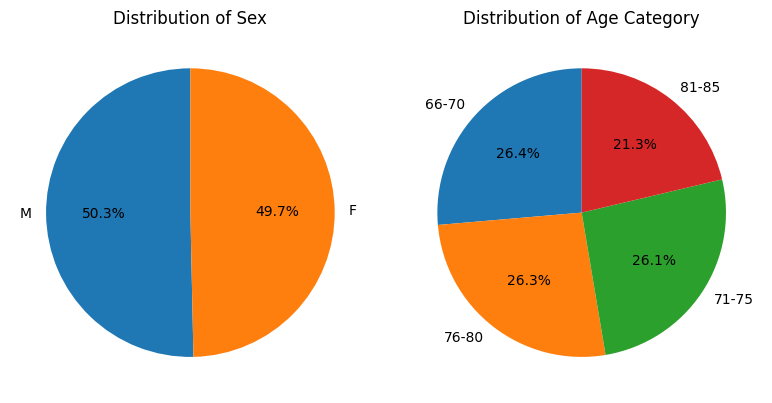

In [ ]:


# Calculate value counts for 'Sex' and 'AgeCategory'
sex_counts = hc['Sex'].value_counts()
age_category_counts = hc['AgeCategory'].value_counts()

# Create pie charts
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')

plt.subplot(1, 2, 2)
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Category')

plt.tight_layout()
plt.show()

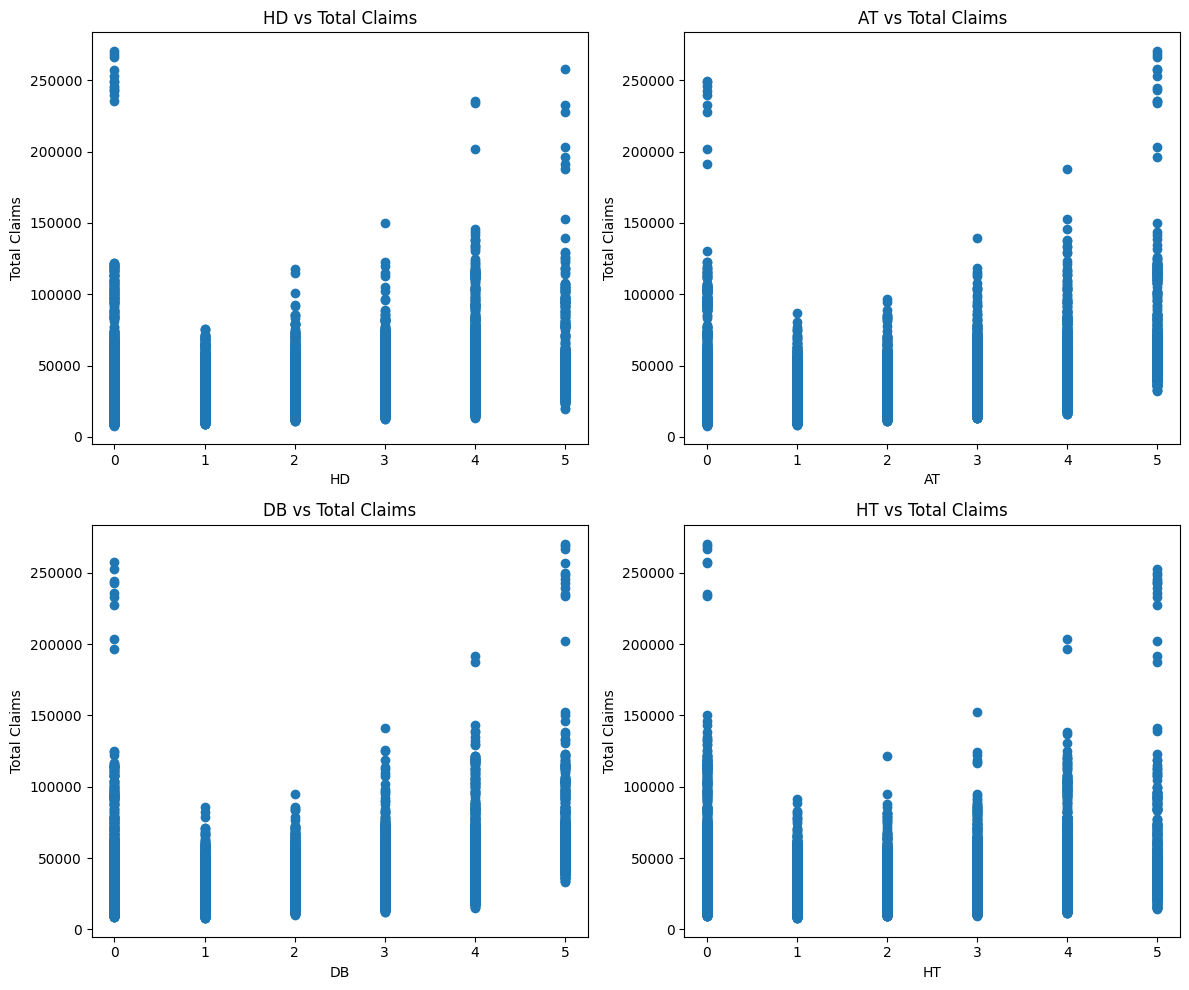

In [ ]:


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# HD vs TotalClaims
axes[0, 0].scatter(hc['HD'], hc['TotalClaims'])
axes[0, 0].set_title('HD vs Total Claims')
axes[0, 0].set_xlabel('HD')
axes[0, 0].set_ylabel('Total Claims')

# AT vs TotalClaims
axes[0, 1].scatter(hc['AT'], hc['TotalClaims'])
axes[0, 1].set_title('AT vs Total Claims')
axes[0, 1].set_xlabel('AT')
axes[0, 1].set_ylabel('Total Claims')

# DB vs TotalClaims
axes[1, 0].scatter(hc['DB'], hc['TotalClaims'])
axes[1, 0].set_title('DB vs Total Claims')
axes[1, 0].set_xlabel('DB')
axes[1, 0].set_ylabel('Total Claims')

# HT vs TotalClaims
axes[1, 1].scatter(hc['HT'], hc['TotalClaims'])
axes[1, 1].set_title('HT vs Total Claims')
axes[1, 1].set_xlabel('HT')
axes[1, 1].set_ylabel('Total Claims')

plt.tight_layout()
plt.show()


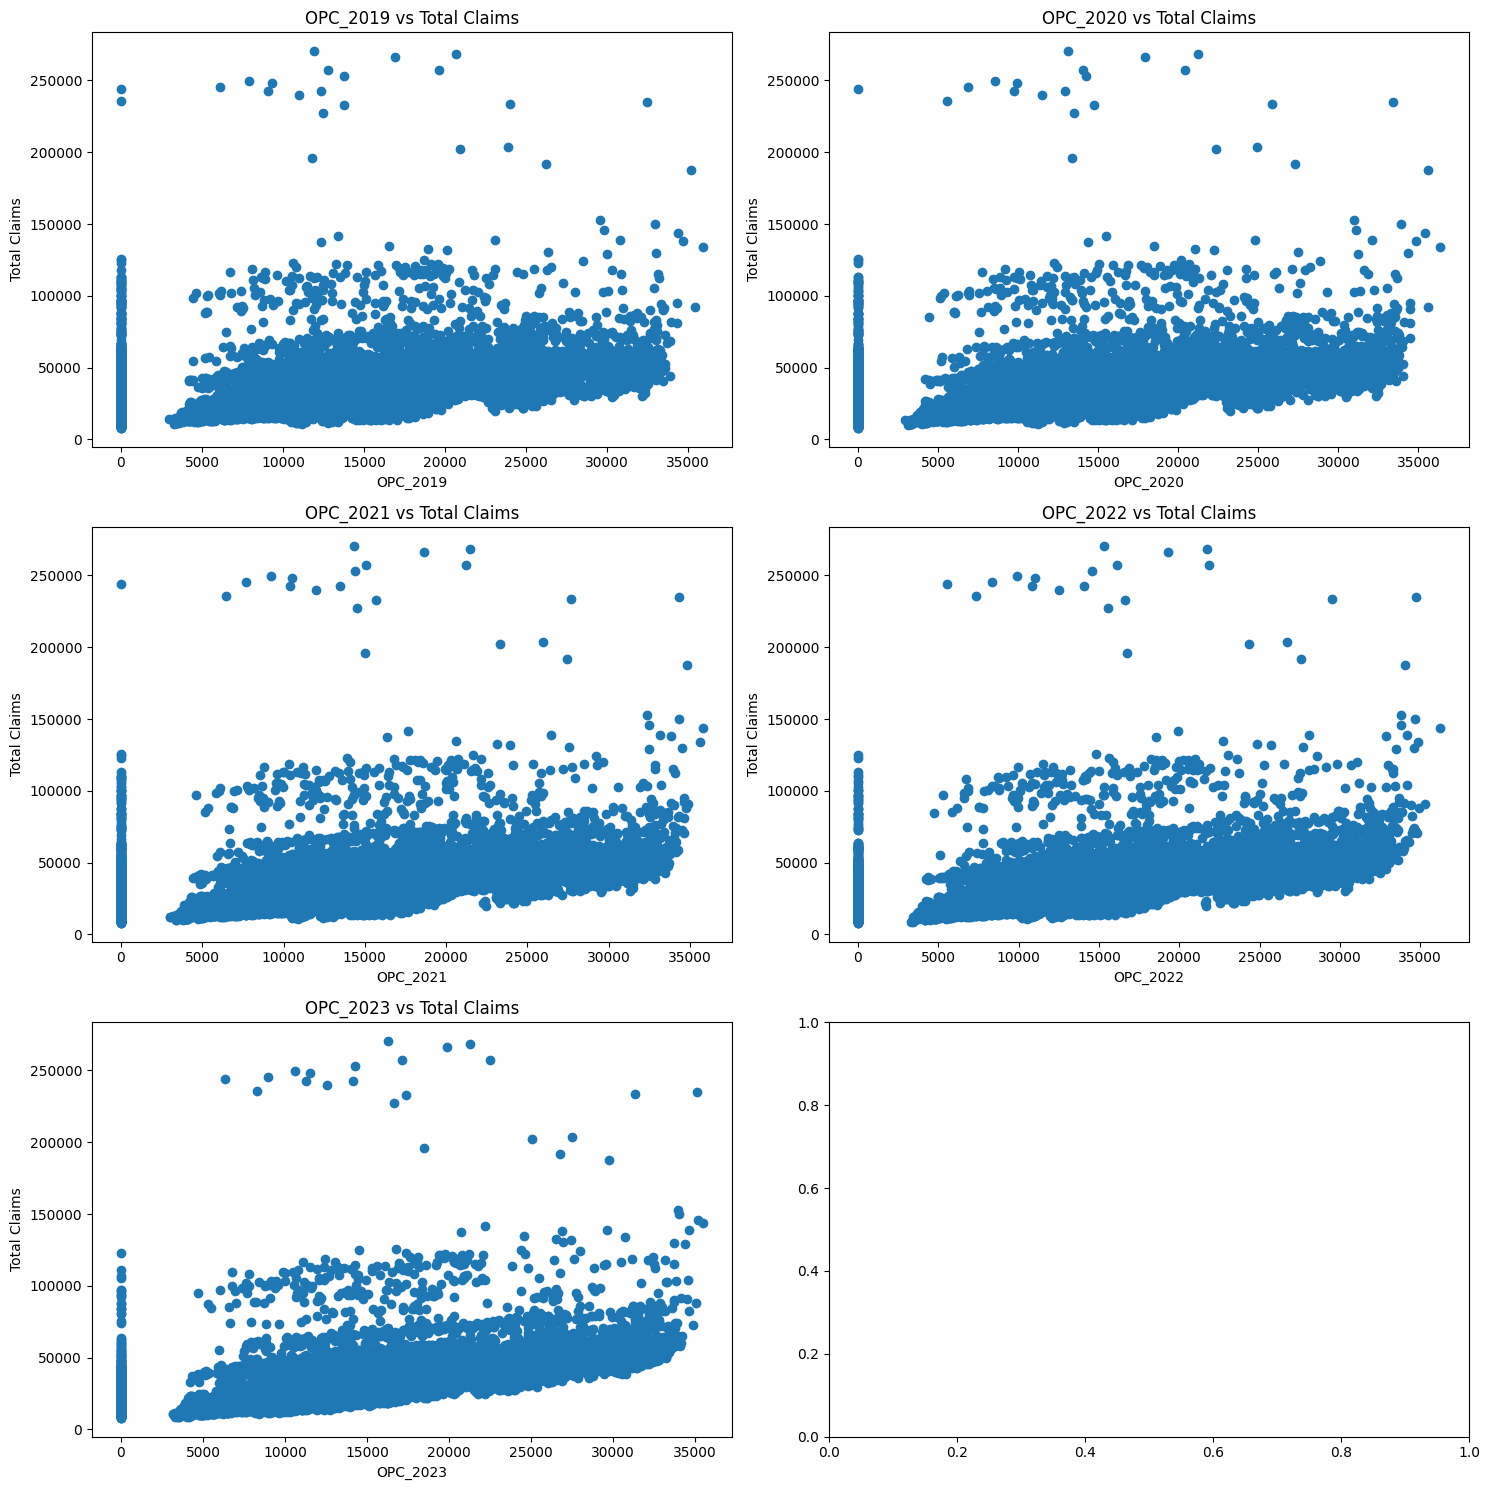

In [ ]:


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# OPC_2019 vs TotalClaims
axes[0, 0].scatter(hc['OPC_2019'], hc['TotalClaims'])
axes[0, 0].set_title('OPC_2019 vs Total Claims')
axes[0, 0].set_xlabel('OPC_2019')
axes[0, 0].set_ylabel('Total Claims')

# OPC_2020 vs TotalClaims
axes[0, 1].scatter(hc['OPC_2020'], hc['TotalClaims'])
axes[0, 1].set_title('OPC_2020 vs Total Claims')
axes[0, 1].set_xlabel('OPC_2020')
axes[0, 1].set_ylabel('Total Claims')

# OPC_2021 vs TotalClaims
axes[1, 0].scatter(hc['OPC_2021'], hc['TotalClaims'])
axes[1, 0].set_title('OPC_2021 vs Total Claims')
axes[1, 0].set_xlabel('OPC_2021')
axes[1, 0].set_ylabel('Total Claims')

# OPC_2022 vs TotalClaims
axes[1, 1].scatter(hc['OPC_2022'], hc['TotalClaims'])
axes[1, 1].set_title('OPC_2022 vs Total Claims')
axes[1, 1].set_xlabel('OPC_2022')
axes[1, 1].set_ylabel('Total Claims')

# OPC_2023 vs TotalClaims
axes[2, 0].scatter(hc['OPC_2023'], hc['TotalClaims'])
axes[2, 0].set_title('OPC_2023 vs Total Claims')
axes[2, 0].set_xlabel('OPC_2023')
axes[2, 0].set_ylabel('Total Claims')

plt.tight_layout()
plt.show()


In [ ]:
#hc = hc.drop(columns=['Sex'])

### **New** **Variables**

In [ ]:

hc['Disease_Burden'] = hc['HD'] + hc['HT'] + hc['DB'] + hc['AT']
hc['Comorbidity_Count'] = ((hc['HD'] > 1).astype(int) + (hc['HT'] > 1).astype(int) + (hc['DB'] > 1).astype(int) + (hc['AT'] > 1).astype(int))
hc['Is_HighRisk'] = (hc['Disease_Burden'] > 12).astype(int)
hc['Is_MultiComorbidity'] = (hc['Comorbidity_Count'] > 2).astype(int)
hc['Avg_Severity'] = hc['Disease_Burden'] / hc['Comorbidity_Count']
hc['Is_Null'] = (hc[['HD', 'HT', 'DB', 'AT']].apply(lambda row: 0 in row.values, axis=1)).astype(int)
hc['Is_Critical'] = (hc[['HD', 'HT', 'DB', 'AT']].max(axis=1) == 5).astype(int)

In [ ]:
​

# Calculate Growth_2023_2022, Growth_2022_2021
hc['Growth_2023_2022'] = ((hc['OPC_2023'] - hc['OPC_2022']) / hc['OPC_2022']) * 100
hc['Growth_2022_2021'] = ((hc['OPC_2022'] - hc['OPC_2021']) / hc['OPC_2021']) * 100

# Calculate Total_OPC
hc['Total_OPC'] = hc['OPC_2023'] + hc['OPC_2022'] + hc['OPC_2021'] + hc['OPC_2020'] + hc['OPC_2019']

# Calculate Average_Yearly_Cost
hc['Average_Yearly_Cost'] = hc['Total_OPC'] / 5

# Calculate Proportion_2023
hc['Proportion_2023'] = (hc['OPC_2023'] / hc['Total_OPC'])


In [ ]:
hc.head()

,Sex,Age,HD,HT,DB,AT,OPC_2023,OPC_2022,OPC_2021,OPC_2020,...,Is_HighRisk,Is_MultiComorbidity,Avg_Severity,Is_Null,Is_Critical,Growth_2023_2022,Growth_2022_2021,Total_OPC,Average_Yearly_Cost,Proportion_2023
PatientID,,,,,,,,,,,,,,,,,,,,,
100041,M,79,4.0,2.0,0.0,0.0,17312.0,16769.0,16226.0,15522.0,...,0,0,6.0,1,0,3.238118,3.346481,80648.0,16129.6,0.214661
100179,F,71,1.0,1.0,1.0,0.0,14028.0,12292.0,10557.0,8936.0,...,0,0,inf,1,0,14.123007,16.434593,53129.0,10625.8,0.264037
100210,F,84,4.0,1.0,4.0,2.0,24653.0,30431.0,31393.0,32357.0,...,0,0,11.0,0,0,-18.987217,-3.064377,151040.0,30208.0,0.163222
100794,M,67,1.0,0.0,3.0,0.0,5113.0,0.0,0.0,0.0,...,0,0,4.0,1,0,inf,NaN,5113.0,1022.6,1.000000
101629,M,72,2.0,1.0,1.0,0.0,15652.0,14150.0,12376.0,10602.0,...,0,0,4.0,1,0,10.614841,14.334195,61762.0,12352.4,0.253424


In [ ]:


hc[hc['Avg_Severity'] == np.inf][['Disease_Burden', 'Comorbidity_Count', 'Avg_Severity']]

,Disease_Burden,Comorbidity_Count,Avg_Severity
PatientID,,,
100179,3.0,0,inf
106543,2.0,0,inf
107568,2.0,0,inf
128430,2.0,0,inf
133573,2.0,0,inf
...,...,...,...
7007513,2.0,0,inf
7010891,2.0,0,inf
7022571,2.0,0,inf


In [ ]:
hc.head()

,Sex,Age,HD,HT,DB,AT,OPC_2023,OPC_2022,OPC_2021,OPC_2020,...,Is_HighRisk,Is_MultiComorbidity,Avg_Severity,Is_Null,Is_Critical,Growth_2023_2022,Growth_2022_2021,Total_OPC,Average_Yearly_Cost,Proportion_2023
PatientID,,,,,,,,,,,,,,,,,,,,,
100041,M,79,4.0,2.0,0.0,0.0,17312.0,16769.0,16226.0,15522.0,...,0,0,3.000000,1,0,3.238118,3.346481,80648.0,16129.6,0.214661
100179,F,71,1.0,1.0,1.0,0.0,14028.0,12292.0,10557.0,8936.0,...,0,0,inf,1,0,14.123007,16.434593,53129.0,10625.8,0.264037
100210,F,84,4.0,1.0,4.0,2.0,24653.0,30431.0,31393.0,32357.0,...,0,1,3.666667,0,0,-18.987217,-3.064377,151040.0,30208.0,0.163222
100794,M,67,1.0,0.0,3.0,0.0,5113.0,0.0,0.0,0.0,...,0,0,4.000000,1,0,inf,NaN,5113.0,1022.6,1.000000
101629,M,72,2.0,1.0,1.0,0.0,15652.0,14150.0,12376.0,10602.0,...,0,0,4.000000,1,0,10.614841,14.334195,61762.0,12352.4,0.253424


In [ ]:

# Replace inf with 100 in Growth_2023_2022 and Growth_2022_2021
hc['Growth_2023_2022'] = hc['Growth_2023_2022'].replace([np.inf, -np.inf], 100)
hc['Growth_2022_2021'] = hc['Growth_2022_2021'].replace([np.inf, -np.inf], 100)

# Replace NaN with 0 in Growth_2023_2022 and Growth_2022_2021
hc['Growth_2023_2022'] = hc['Growth_2023_2022'].fillna(0)
hc['Growth_2022_2021'] = hc['Growth_2022_2021'].fillna(0)

# Replace inf with 1 in avg_severity
hc['Avg_Severity'] = hc['Avg_Severity'].replace([np.inf, -np.inf], 1)

In [ ]:
numerical_fields = hc.select_dtypes(include=['number']).columns.tolist()
categorical_fields = hc.select_dtypes(include=['object']).columns.tolist()

In [ ]:
hc.isnull().sum()

,0
Sex,0
Age,0
HD,0
HT,0
DB,0
AT,0
OPC_2023,0
OPC_2022,0
OPC_2021,0
OPC_2020,0


In [ ]:


hc['Proportion_2023'] = hc['Proportion_2023'].fillna(0)

#### **Correlation** **and** **Feature** **Importance** **chart**

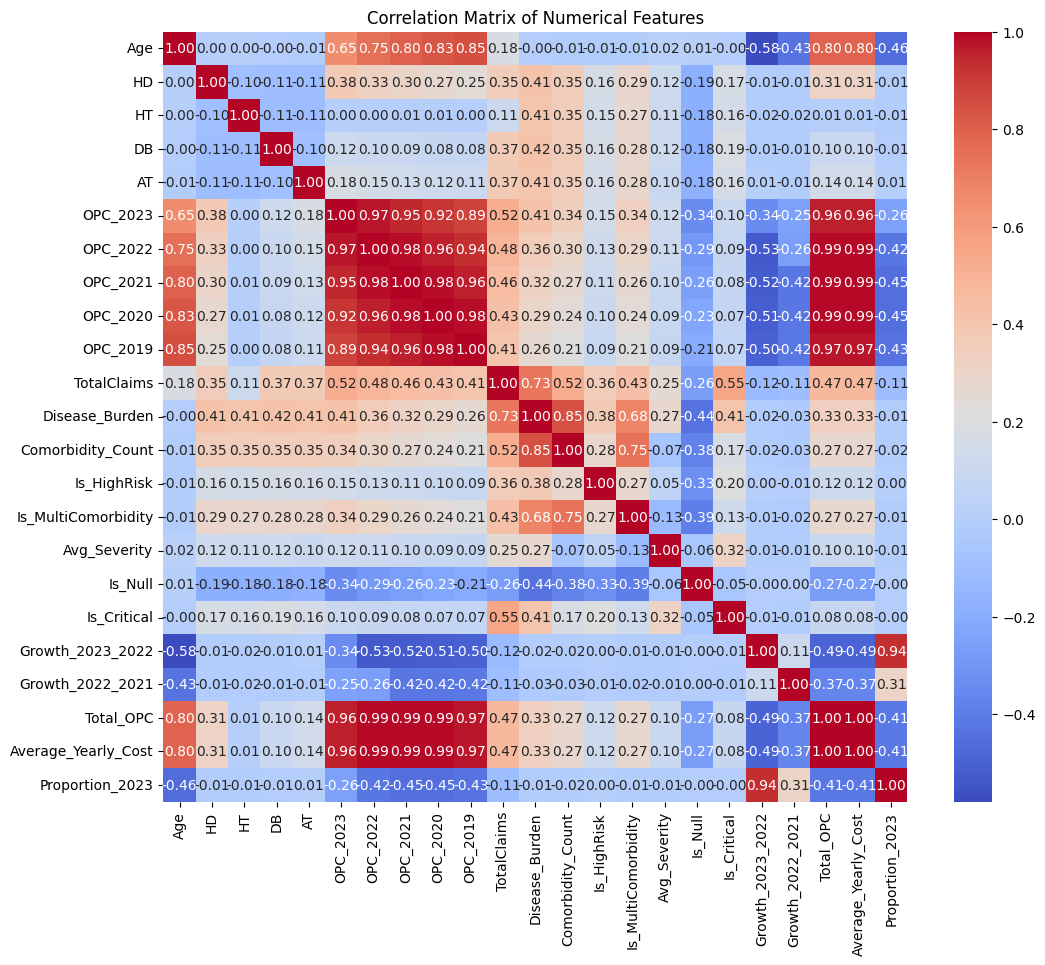

In [ ]:


# Calculate the correlation matrix
correlation_matrix = hc[numerical_fields].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
hc1 = hc.copy()

In [ ]:
# Create one-hot encoded variables for HD, HT, AT, DB
hc1 = pd.get_dummies(hc1, columns=['HD', 'HT', 'AT', 'DB'], prefix=['HD', 'HT', 'AT', 'DB'])

hc1.head()

,Sex,Age,OPC_2023,OPC_2022,OPC_2021,OPC_2020,OPC_2019,TotalClaims,AgeCategory,Disease_Burden,...,AT_2.0,AT_3.0,AT_4.0,AT_5.0,DB_0.0,DB_1.0,DB_2.0,DB_3.0,DB_4.0,DB_5.0
PatientID,,,,,,,,,,,,,,,,,,,,,
100041,M,79,17312.0,16769.0,16226.0,15522.0,14819.0,28424,76-80,6.0,...,False,False,False,False,True,False,False,False,False,False
100179,F,71,14028.0,12292.0,10557.0,8936.0,7316.0,22212,71-75,3.0,...,False,False,False,False,False,True,False,False,False,False
100210,F,84,24653.0,30431.0,31393.0,32357.0,32206.0,44841,81-85,11.0,...,True,False,False,False,False,False,False,False,True,False
100794,M,67,5113.0,0.0,0.0,0.0,0.0,16506,66-70,4.0,...,False,False,False,False,False,False,False,True,False,False
101629,M,72,15652.0,14150.0,12376.0,10602.0,8982.0,25796,71-75,4.0,...,False,False,False,False,False,True,False,False,False,False


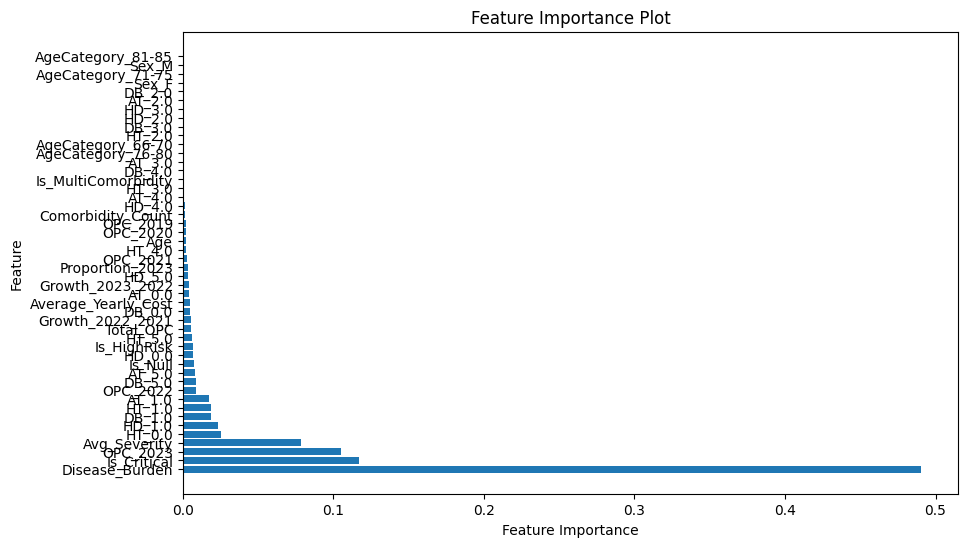

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'hc1' DataFrame is already created and contains your data
# Replace 'TargetVariable' with the name of your target variable
X = hc1.drop('TotalClaims', axis=1)
y = hc1['TotalClaims']

X = pd.get_dummies(X, columns=['AgeCategory', 'Sex'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:

feature_importance_df.to_excel('feature_importance.xlsx', index=False)

print("Feature importance exported to 'feature_importance.xlsx'")

Feature importance exported to 'feature_importance.xlsx'


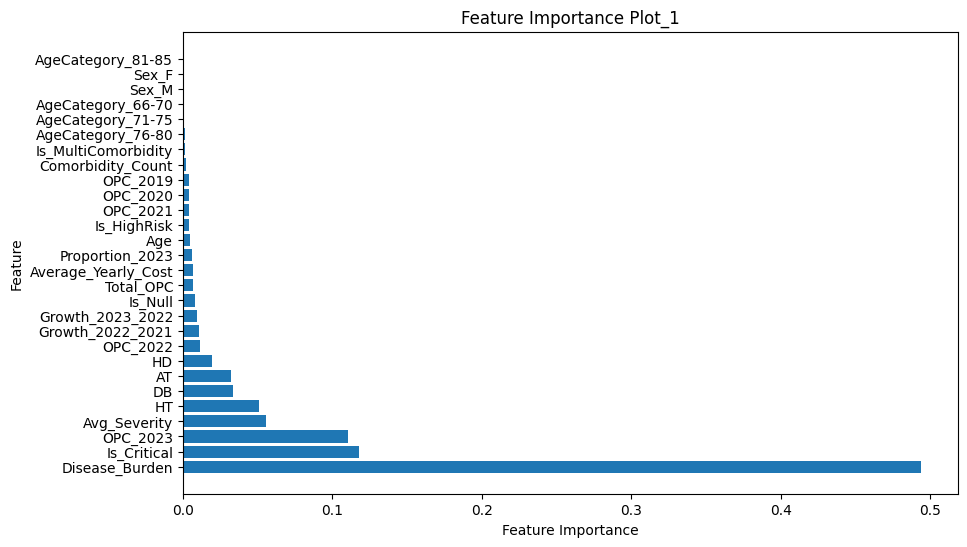

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = hc.drop('TotalClaims', axis=1)  # Remove the target variable
y = hc['TotalClaims']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['AgeCategory', 'Sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model (you can choose other models too)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot_1')
plt.show()

In [ ]:
# Export the DataFrame to an Excel file
feature_importance_df.to_excel('feature_importance_plot_1.xlsx', index=False)

print("Feature importance exported to 'feature_importance_plot_1.xlsx'")

Feature importance exported to 'feature_importance_plot_1.xlsx'


In [ ]:
hc2 = hc.copy()

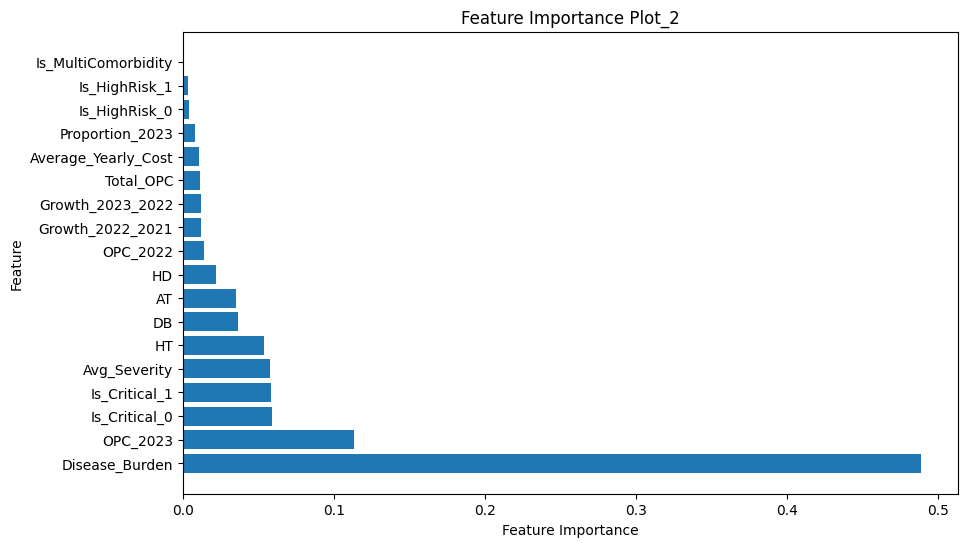

Feature importance exported to 'feature_importance_plot_2.xlsx'


In [ ]:
# Drop the specified columns
hc2 = hc2.drop(['Age', 'Sex', 'AgeCategory', 'OPC_2021', 'OPC_2020', 'OPC_2019', 'Comorbidity_Count', 'Is_Null'], axis=1)

# Define your features (X) and target (y)
X = hc2.drop('TotalClaims', axis=1)  # Remove the target variable
y = hc2['TotalClaims']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Is_HighRisk', 'Is_Critical'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model (you can choose other models too)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot_2')
plt.show()

# Assuming 'feature_importance_df' DataFrame is already created from the code you provided

# Export the DataFrame to an Excel file
feature_importance_df.to_excel('feature_importance_plot_2.xlsx', index=False)

print("Feature importance exported to 'feature_importance_plot_2.xlsx'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


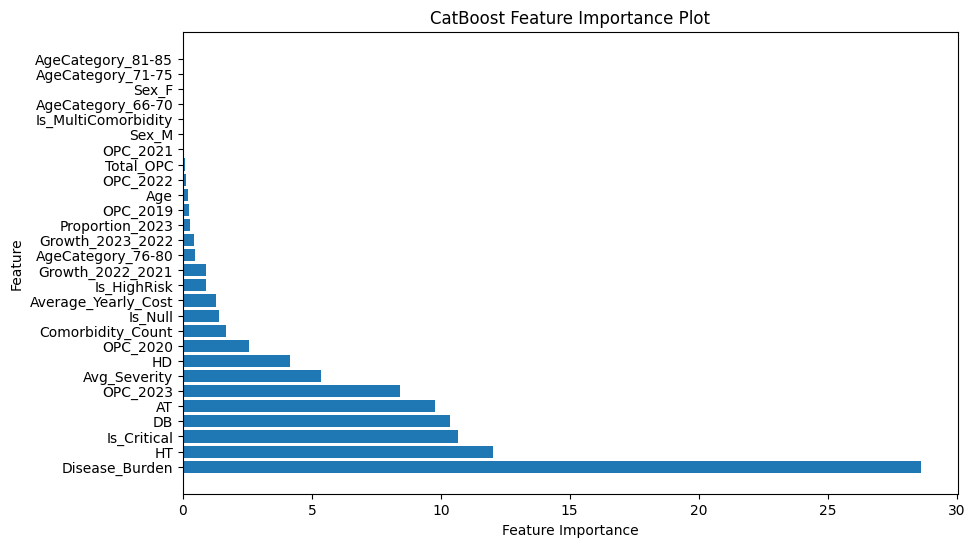

Feature importance exported to 'catboost_feature_importance.xlsx'


In [ ]:
!pip install catboost

from catboost import CatBoostRegressor
import matplotlib.pyplot as plt


# Define your features (X) and target (y)
X = hc.drop('TotalClaims', axis=1)  # Remove the target variable
y = hc['TotalClaims']

# Convert categorical variables to numerical using one-hot encoding (if needed)
X = pd.get_dummies(X, columns=['AgeCategory', 'Sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a CatBoost model
model = CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.get_feature_importance()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance Plot')
plt.show()


# Export the DataFrame to an Excel file
feature_importance_df.to_excel('catboost_feature_importance.xlsx', index=False)

print("Feature importance exported to 'catboost_feature_importance.xlsx'")

In [ ]:
hc.columns

### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = hc.drop(columns=['TotalClaims', 'Is_Null'], axis=1)
y = hc['TotalClaims']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11703, 23), (2926, 23), (11703,), (2926,))

### **Data Preprocessing**

In [ ]:
!pip install category_encoders
!pip install lightgbm
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


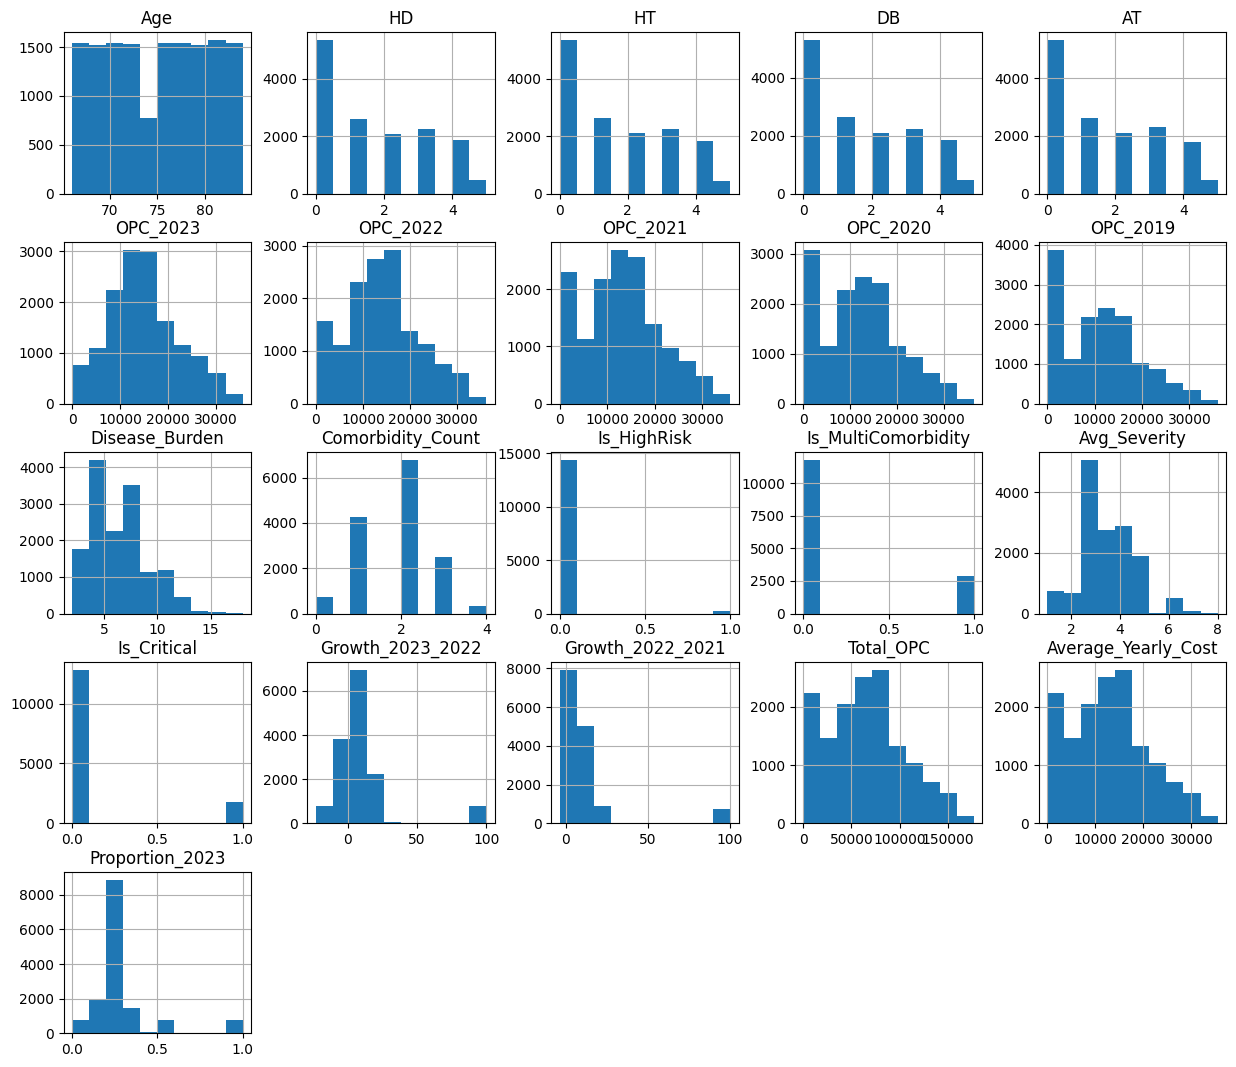

In [ ]:
X.hist(figsize=(15,13))
plt.show()

In [ ]:


print(hc['HD'].unique())
print(hc['HT'].unique())
print(hc['DB'].unique())
print(hc['AT'].unique())

[4. 1. 2. 0. 3. 5.]
[2. 1. 0. 4. 3. 5.]
[0. 1. 4. 3. 2. 5.]
[0. 2. 5. 1. 3. 4.]


In [ ]:
hc.columns

Index(['Sex', 'Age', 'HD', 'HT', 'DB', 'AT', 'OPC_2023', 'OPC_2022',
       'OPC_2021', 'OPC_2020', 'OPC_2019', 'TotalClaims', 'AgeCategory',
       'Disease_Burden', 'Is_HighRisk', 'Is_Null', 'Is_Critical',
       'Growth_2023_2022', 'Growth_2022_2021', 'Total_OPC',
       'Average_Yearly_Cost', 'Proportion_2023', 'Comorbidity_Count',
       'Is_MultiComorbidity', 'Avg_Severity'],
      dtype='object')

In [ ]:
quant_attrs = ['Age']
cat = ['Sex', 'AgeCategory']
log_attrs = ['OPC_2023', 'OPC_2022', 'OPC_2021', 'OPC_2020', 'OPC_2019']
doubt_attrs = ['Disease_Burden', 'Growth_2023_2022', 'Growth_2022_2021',
             'Total_OPC', 'Average_Yearly_Cost', 'Proportion_2023', 'Avg_Severity']




quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=100))])
quantile_pipeline1 = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=200))])
log_pipeline = Pipeline([("log transform", PowerTransformer(method = 'yeo-johnson')), ('standard scaler', StandardScaler())])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])

preprocessing_pipelines = [
     ColumnTransformer([
    ("quantile1", quantile_pipeline1, quant_attrs),
    ("log", log_pipeline, log_attrs),
    ('cat', cat_pipeline, cat)],
     remainder='passthrough'
),
      ColumnTransformer([
    ("quantile1", quantile_pipeline1, quant_attrs),
    ("doubtquant", quantile_pipeline1, doubt_attrs),
    ("log", log_pipeline, log_attrs),
    ('cat', cat_pipeline, cat)],
     remainder='passthrough'
),
     ColumnTransformer([
    ("quantile1", quantile_pipeline1, quant_attrs),
    ("dountlog", log_pipeline, doubt_attrs),
    ("log", log_pipeline, log_attrs),
    ('cat', cat_pipeline, cat)],
     remainder='passthrough'
)
    ]
regressors = [
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    ('XGBoost', XGBRegressor(random_state=42))
]

In [ ]:
# Initialize results dictionary
results = {}

# Iterate over preprocessing pipelines
for i, preprocessing in enumerate(preprocessing_pipelines):
    # Initialize result dictionary for this pipeline
    results[f'Pipeline {i+1}'] = {}

    # Iterate over regressors
    for name, regressor in regressors:
        # Create the full pipeline
        model_pipeline = Pipeline(steps=[
            ('preprocessing', preprocessing),
            ('regressor', regressor)
        ])

        # Train the model
        model_pipeline.fit(X_train, y_train)

        # Predict and calculate MAE
        y_pred = model_pipeline.predict(X_valid)
        mae = mean_absolute_error(y_valid, y_pred)

        # Store the result
        results[f'Pipeline {i+1}'][name] = mae

    # Create the Stacking and Voting Regressors
    stacking_regressor = StackingRegressor(
        estimators=[(name, regressor) for name, regressor in regressors],
        final_estimator=RandomForestRegressor(random_state=42)
    )
    voting_regressor = VotingRegressor(
        estimators=[(name, regressor) for name, regressor in regressors]
    )

    # Train and evaluate Stacking Regressor
    stacking_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('stacking', stacking_regressor)
    ])
    stacking_pipeline.fit(X_train, y_train)
    y_pred_stack = stacking_pipeline.predict(X_valid)
    mae_stack = mean_absolute_error(y_valid, y_pred_stack)
    results[f'Pipeline {i+1}']['Stacking Regressor'] = mae_stack

    # Train and evaluate Voting Regressor
    voting_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('voting', voting_regressor)
    ])
    voting_pipeline.fit(X_train, y_train)
    y_pred_vote = voting_pipeline.predict(X_valid)
    mae_vote = mean_absolute_error(y_valid, y_pred_vote)
    results[f'Pipeline {i+1}']['Voting Regressor'] = mae_vote



In [ ]:

# Print the results
for pipeline_name, pipeline_results in results.items():
    print(f"**{pipeline_name}**")
    for regressor_name, mae in pipeline_results.items():
        print(f"  - {regressor_name}: MAE = {mae:.4f}")
    print()


**Pipeline 1**
  - Random Forest: MAE = 973.7587
  - CatBoost: MAE = 704.1729
  - XGBoost: MAE = 960.4185
  - Stacking Regressor: MAE = 701.9434
  - Voting Regressor: MAE = 712.3197

**Pipeline 2**
  - Random Forest: MAE = 976.3573
  - CatBoost: MAE = 696.1809
  - XGBoost: MAE = 972.2486
  - Stacking Regressor: MAE = 705.0086
  - Voting Regressor: MAE = 712.7282

**Pipeline 3**
  - Random Forest: MAE = 975.5507
  - CatBoost: MAE = 696.1830
  - XGBoost: MAE = 953.4261
  - Stacking Regressor: MAE = 710.1664
  - Voting Regressor: MAE = 708.9289



In [ ]:
# Initialize results dictionary
preprocessor = preprocessing_pipelines[1]
regressors = [
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    #('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    #('XGBoost', XGBRegressor(random_state=42))
]

results = {}

# Evaluate each regressor
for name, regressor in regressors:
    # Create a pipeline with preprocessing and regressor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_valid)

    # Calculate MAE
    mae = mean_absolute_error(y_valid, y_pred)
    results[name] = mae



In [ ]:
for name, mae in results.items():
    print(f"{name}: MAE = {mae:.4f}")

CatBoost: MAE = 696.1809


In [ ]:
# Create a voting regressor using the trained models
voting_regressor = VotingRegressor(estimators=[
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    ('XGBoost', XGBRegressor(random_state=42))
])

# Create a pipeline with preprocessing and voting regressor
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_regressor', voting_regressor)
])

# Fit the voting model
voting_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_pipeline.predict(X_valid)

# Calculate MAE for the voting model
mae_voting = mean_absolute_error(y_valid, y_pred_voting)

print(f"Voting Regressor: MAE = {mae_voting:.4f}")


Voting Regressor: MAE = 708.8701


In [ ]:
# Create a stacking regressor using the trained models
estimators = [
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    #('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    ('XGBoost', XGBRegressor(random_state=42))
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()  # You can change the final estimator if needed
)

# Create a pipeline with preprocessing and stacking regressor
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking_regressor', stacking_regressor)
])

# Fit the stacking model
stacking_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_pipeline.predict(X_valid)

# Calculate MAE for the stacking model
mae_stacking = mean_absolute_error(y_valid, y_pred_stacking)

print(f"Stacking Regressor: MAE = {mae_stacking:.4f}")


Stacking Regressor: MAE = 772.1140


### **Hypertuning**

In [ ]:
## Hypertuning not done for this version

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor  # Import ExtraTreesRegressor


In [ ]:
# Define hyperparameter tuning parameters separately for each regressor
param_grids = {


    'CatBoost': {
        'iterations': [500, 800, 1000],
        'learning_rate': [0.20, 0.25, 0.5, 0.75],
        'depth': [6,  7, 8, 9],
        'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [1, 5, 10]
    }
}

# Define regressors list
regressors = [
    #('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    #('Extra Trees', ExtraTreesRegressor(random_state=42)),
    #('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    #('XGBoost', XGBRegressor(random_state=42))
]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

# Initialize results dictionary
tuned_results = {}

# Perform Grid Search for each regressor
for name, regressor in regressors:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Use the correct param_grid for each regressor
    param_grid = param_grids[name]
    param_grid = {'regressor__' + key: value for key, value in param_grid.items()}
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring=mae_scorer)
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set using the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)

    # Calculate MAE on the test set
    test_mae = mean_absolute_error(y_valid, y_pred)

    tuned_results[name] = {
        'best_mae': -grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'test_mae': test_mae
    }




In [ ]:
for name, result in tuned_results.items():
    print(f"**{name}**")
    print(f"  - Best Parameters: {result['best_params']}")
    print(f"  - Test MAE: {result['test_mae']:.4f}")
    print()

NameError: name 'tuned_results' is not defined

In [ ]:


from sklearn.metrics import make_scorer

# Use the best parameters from the GridSearchCV results
best_params = {'depth': 7, 'iterations': 500, 'learning_rate': 0.25}

# Create a CatBoost model with the best parameters
catboost_model = CatBoostRegressor(random_state=42, silent=True, **best_params)

# Create a pipeline with preprocessing and CatBoost model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = model_pipeline.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters: {mae:.4f}")

CatBoost MAE with best parameters: 610.4052


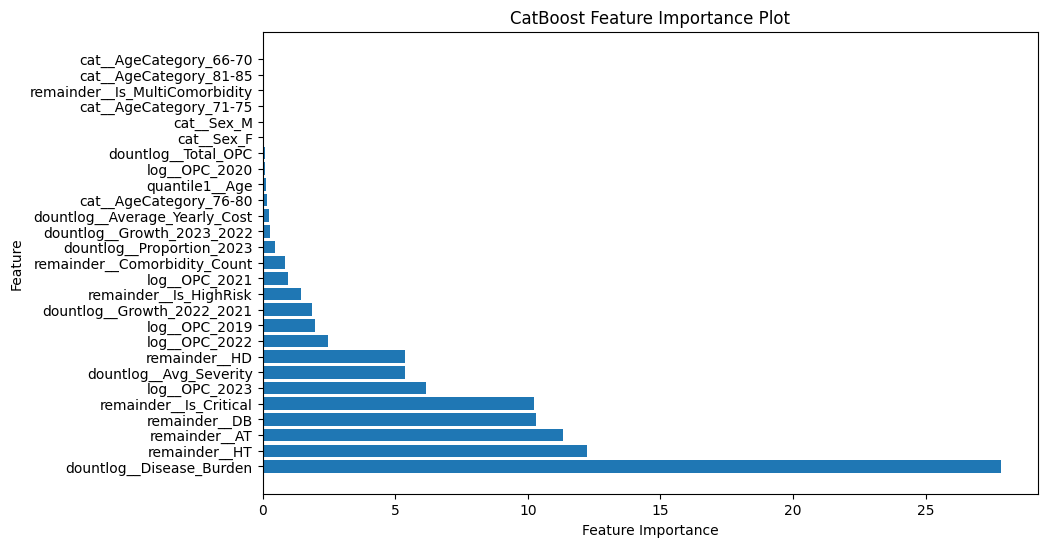

Feature importance exported to 'catboost_feature_importance_plot.xlsx'


In [ ]:

# Get feature importances from the trained CatBoost model
feature_importances = catboost_model.get_feature_importance()

# Get feature names from the preprocessed data
feature_names = model_pipeline['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance Plot')
plt.show()

# Export the DataFrame to an Excel file
feature_importance_df.to_excel('catboost_feature_importance_plot.xlsx', index=False)

print("Feature importance exported to 'catboost_feature_importance_plot.xlsx'")

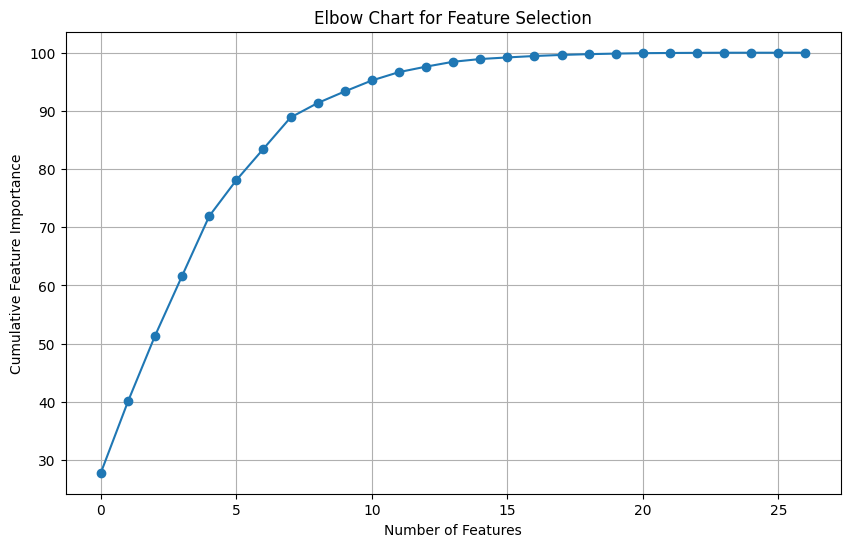

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' is your DataFrame with 'Feature' and 'Importance' columns
# ... (Your existing code to generate feature_importance_df)

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create a list of cumulative feature importances
cumulative_importance = np.cumsum(feature_importance_df['Importance'])

# Plot the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_importance_df)), cumulative_importance, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Feature Importance')
plt.title('Elbow Chart for Feature Selection')
plt.grid(True)
plt.show()

### **Training on Full Dataset**

In [ ]:


# Fit the voting model on the full dataset
voting_pipeline.fit(X, y)

# Fit the stacking model on the full dataset
stacking_pipeline.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile1',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=200))]),
                                                  ['Age']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   PowerTransformer()),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['OPC_2019', 'OPC_2020',
                                                   'OPC_2021', 'OPC_2022',
                                                   'OPC_2023'])]...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                   final_estimator=LinearRegression()))])

In [ ]:


# Fit CatBoost on the full dataset
catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('catboost', CatBoostRegressor(random_state=42, depth= 7, iterations= 500, learning_rate= 0.25, silent=True))
])
catboost_pipeline.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile1',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=200))]),
                                                  ['Age']),
                                                 ('doubtquant',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=200))]),
                                                  ['Disease_Burden',
                                                   'Growth_2023_2022',
                                                   'Growth_2022_2021',
                                                   'Total_O...
                                                   'Avg_Severity']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   PowerTransformer()),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['OPC_2023', 'OPC_2022',
                                                   'OPC_2021', 'OPC_2020',
                                                   'OPC_2019']),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical '
                                                                   'transform',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'AgeCategory'])])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x7a1f3608f370>)])

### **Testing on unseen data**

In [ ]:
test = pd.read_json('patient_data_test.json')
data_flat1 = pd.json_normalize(test['Conditions'])
data_flat2 = pd.json_normalize(test['Out patient costs'])

In [ ]:
test1 = pd.concat([test.drop(columns=['Conditions', 'Out patient costs']), data_flat1, data_flat2], axis=1)
test1 = test1.set_index('PatientID')
test1 = test1.rename(columns={
    '2023': 'OPC_2023',
    '2022': 'OPC_2022',
    '2021': 'OPC_2021',
    '2020': 'OPC_2020',
    '2019': 'OPC_2019'
})

#test1 = test1.drop(columns=['Sex', 'OPC_2022', 'OPC_2021', 'OPC_2020', 'OPC_2019'])

In [ ]:
test1 = test1.fillna(0)

In [ ]:
test1['Disease_Burden'] = test1['HD'] + test1['HT'] + test1['DB'] + test1['AT']
test1['Comorbidity_Count'] = ((test1['HD'] > 1).astype(int) + (test1['HT'] > 1).astype(int) + (test1['DB'] > 1).astype(int) + (test1['AT'] > 1).astype(int))
test1['Is_HighRisk'] = (test1['Disease_Burden'] > 12).astype(int)
test1['Is_MultiComorbidity'] = (test1['Comorbidity_Count'] > 2).astype(int)
test1['Avg_Severity'] = test1['Disease_Burden'] / test1['Comorbidity_Count']
test1['Is_Null'] = (test1[['HD', 'HT', 'DB', 'AT']].apply(lambda row: 0 in row.values, axis=1)).astype(int)
test1['Is_Critical'] = (test1[['HD', 'HT', 'DB', 'AT']].max(axis=1) == 5).astype(int)

# Calculate Growth_2023_2022, Growth_2022_2021
test1['Growth_2023_2022'] = ((test1['OPC_2023'] - test1['OPC_2022']) / test1['OPC_2022']) * 100
test1['Growth_2022_2021'] = ((test1['OPC_2022'] - test1['OPC_2021']) / test1['OPC_2021']) * 100

# Calculate Total_OPC
test1['Total_OPC'] = test1['OPC_2023'] + test1['OPC_2022'] + test1['OPC_2021'] + test1['OPC_2020'] + test1['OPC_2019']

# Calculate Average_Yearly_Cost
test1['Average_Yearly_Cost'] = test1['Total_OPC'] / 5

# Calculate Proportion_2023
test1['Proportion_2023'] = (test1['OPC_2023'] / test1['Total_OPC'])

In [ ]:
# Replace inf with 100 in Growth_2023_2022 and Growth_2022_2021
test1['Growth_2023_2022'] = test1['Growth_2023_2022'].replace([np.inf, -np.inf], 100)
test1['Growth_2022_2021'] = test1['Growth_2022_2021'].replace([np.inf, -np.inf], 100)

# Replace NaN with 0 in Growth_2023_2022 and Growth_2022_2021
test1['Growth_2023_2022'] = test1['Growth_2023_2022'].fillna(0)
test1['Growth_2022_2021'] = test1['Growth_2022_2021'].fillna(0)

# Replace inf with 1 in avg_severity
test1['Avg_Severity'] = test1['Avg_Severity'].replace([np.inf, -np.inf], 1)

test1['Proportion_2023'] = test1['Proportion_2023'].fillna(0)

In [ ]:
def categorize_age(age):
  """Categorizes age into specified ranges."""
  if age < 66:
    return 'Below 66'
  elif 66 <= age <= 70:
    return '66-70'
  elif 71 <= age <= 75:
    return '71-75'
  elif 76 <= age <= 80:
    return '76-80'
  elif 81 <= age <= 85:
    return '81-85'
  else:
    return 'Above 85'

# Apply the function to the 'Age' column in your DataFrame
test1['AgeCategory'] = test1['Age'].apply(categorize_age)


In [ ]:


import pandas as pd
# Predict using the voting regressor
y_pred_test = voting_pipeline.predict(test1)

# Create a DataFrame with PatientID and predicted TotalClaims
submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_voting_10_31.csv', index=False)


In [ ]:
#stacking
y_pred_test = stacking_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_stacking_10_31.csv', index=False)

In [ ]:
#catboost

y_pred_test = catboost_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_catboost_18_11_pipeline1.csv', index=False)


In [ ]:
#xgboost

y_pred_test = xgboost_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_xgboost.csv', index=False)

In [ ]:
hc.columns

Index(['Sex', 'Age', 'HD', 'HT', 'DB', 'AT', 'OPC_2023', 'OPC_2022',
       'OPC_2021', 'OPC_2020', 'OPC_2019', 'TotalClaims', 'AgeCategory',
       'Disease_Burden', 'Is_HighRisk', 'Is_Null', 'Is_Critical',
       'Growth_2023_2022', 'Growth_2022_2021', 'Total_OPC',
       'Average_Yearly_Cost', 'Proportion_2023', 'Comorbidity_Count',
       'Is_MultiComorbidity', 'Avg_Severity'],
      dtype='object')

#### **Version** **2**

In [ ]:
from sklearn.model_selection import train_test_split
X = hc.drop(columns=['TotalClaims', 'Is_Null', 'Sex', 'Age', 'OPC_2021', 'OPC_2020', 'AgeCategory','Is_HighRisk',
                     'Growth_2023_2022', 'Total_OPC','Average_Yearly_Cost', 'Proportion_2023', 'Comorbidity_Count', 'Is_MultiComorbidity'], axis=1)
y = hc['TotalClaims']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11703, 11), (2926, 11), (11703,), (2926,))

In [ ]:
X.columns

Index(['HD', 'HT', 'DB', 'AT', 'OPC_2023', 'OPC_2022', 'OPC_2019',
       'Disease_Burden', 'Is_Critical', 'Growth_2022_2021', 'Avg_Severity'],
      dtype='object')

In [ ]:
log_attrs = ['OPC_2023', 'OPC_2022', 'OPC_2019', 'Disease_Burden', 'Growth_2022_2021', 'Avg_Severity']
pass_attrs = ['HD', 'HT', 'DB', 'AT', 'Is_Critical']


quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=200))])
log_pipeline = Pipeline([("log transform", PowerTransformer(method = 'yeo-johnson')), ('standard scaler', StandardScaler())])
#cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])

preprocessing_pipelines = [
     ColumnTransformer([
    ("quantile", quantile_pipeline1, log_attrs),
    ('passthrough', 'passthrough', pass_attrs)]
),
      ColumnTransformer([
    ("log", log_pipeline, log_attrs),
    ('passthrough', 'passthrough', pass_attrs)]
)]
regressors = [
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    ('XGBoost', XGBRegressor(random_state=42))
]

In [ ]:
# Initialize results dictionary
results = {}

# Iterate over preprocessing pipelines
for i, preprocessing in enumerate(preprocessing_pipelines):
    # Initialize result dictionary for this pipeline
    results[f'Pipeline {i+1}'] = {}

    # Iterate over regressors
    for name, regressor in regressors:
        # Create the full pipeline
        model_pipeline = Pipeline(steps=[
            ('preprocessing', preprocessing),
            ('regressor', regressor)
        ])

        # Train the model
        model_pipeline.fit(X_train, y_train)

        # Predict and calculate MAE
        y_pred = model_pipeline.predict(X_valid)
        mae = mean_absolute_error(y_valid, y_pred)

        # Store the result
        results[f'Pipeline {i+1}'][name] = mae

    # Create the Stacking and Voting Regressors
    stacking_regressor = StackingRegressor(
        estimators=[(name, regressor) for name, regressor in regressors],
        final_estimator=RandomForestRegressor(random_state=42)
    )
    voting_regressor = VotingRegressor(
        estimators=[(name, regressor) for name, regressor in regressors]
    )

    # Train and evaluate Stacking Regressor
    stacking_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('stacking', stacking_regressor)
    ])
    stacking_pipeline.fit(X_train, y_train)
    y_pred_stack = stacking_pipeline.predict(X_valid)
    mae_stack = mean_absolute_error(y_valid, y_pred_stack)
    results[f'Pipeline {i+1}']['Stacking Regressor'] = mae_stack

    # Train and evaluate Voting Regressor
    voting_pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('voting', voting_regressor)
    ])
    voting_pipeline.fit(X_train, y_train)
    y_pred_vote = voting_pipeline.predict(X_valid)
    mae_vote = mean_absolute_error(y_valid, y_pred_vote)
    results[f'Pipeline {i+1}']['Voting Regressor'] = mae_vote


In [ ]:

# Print the results
for pipeline_name, pipeline_results in results.items():
    print(f"**{pipeline_name}**")
    for regressor_name, mae in pipeline_results.items():
        print(f"  - {regressor_name}: MAE = {mae:.4f}")
    print()

**Pipeline 1**
  - Random Forest: MAE = 949.0887
  - CatBoost: MAE = 721.2283
  - XGBoost: MAE = 962.1247
  - Stacking Regressor: MAE = 701.9350
  - Voting Regressor: MAE = 710.8585

**Pipeline 2**
  - Random Forest: MAE = 948.5086
  - CatBoost: MAE = 711.1027
  - XGBoost: MAE = 929.9918
  - Stacking Regressor: MAE = 702.4499
  - Voting Regressor: MAE = 708.1319



In [ ]:
preprocessor = preprocessing_pipelines[1]

In [ ]:
from sklearn.metrics import make_scorer

# Use the best parameters from the GridSearchCV results
best_params = {'depth': 7, 'iterations': 500, 'learning_rate': 0.25}

# Create a CatBoost model with the best parameters
catboost_model = CatBoostRegressor(random_state=42, silent=True, **best_params)

# Create a pipeline with preprocessing and CatBoost model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = model_pipeline.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters: {mae:.4f}")

CatBoost MAE with best parameters: 629.0025


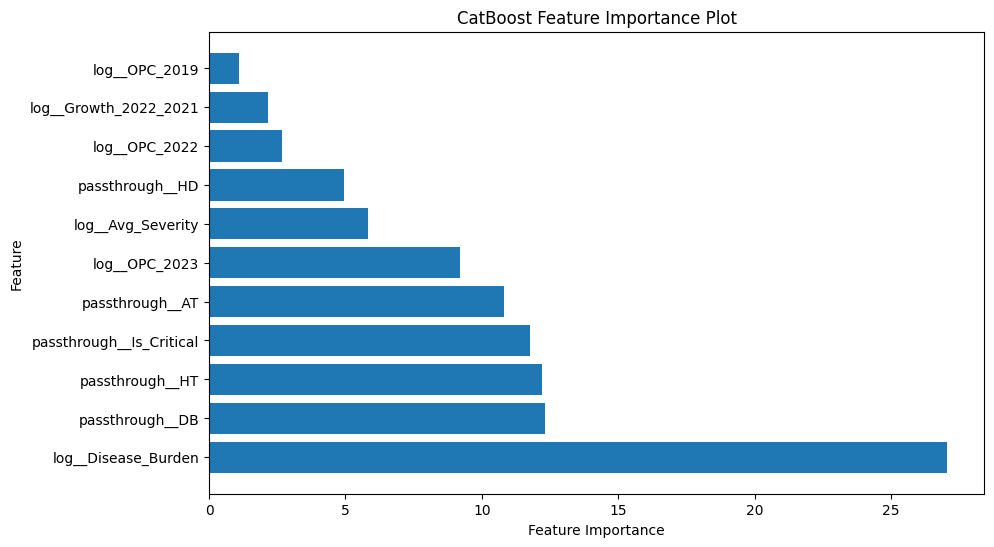

In [ ]:

# Get feature importances from the trained CatBoost model
feature_importances = catboost_model.get_feature_importance()

# Get feature names from the preprocessed data
feature_names = model_pipeline['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance Plot')
plt.show()



In [ ]:
#Training on full dataset

catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('catboost', CatBoostRegressor(random_state=42, depth= 7, iterations= 500, learning_rate= 0.25, silent=True))
])
catboost_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   PowerTransformer()),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['OPC_2023', 'OPC_2022',
                                                   'OPC_2019', 'Disease_Burden',
                                                   'Growth_2022_2021',
                                                   'Avg_Severity']),
                                                 ('passthrough', 'passthrough',
                                                  ['HD', 'HT', 'DB', 'AT',
                                                   'Is_Critical'])])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x7a1f05ef8760>)])

In [ ]:
y_pred_test = catboost_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_catboost_18_11_v2reducedvariables.csv', index=False)

#### **Version3**

In [ ]:
from sklearn.model_selection import train_test_split
X = hc.drop(columns=['TotalClaims', 'Is_Null', 'Sex', 'Age', 'OPC_2020', 'AgeCategory',
                     'Growth_2023_2022', 'Total_OPC','Average_Yearly_Cost',  'Is_MultiComorbidity'], axis=1)
y = hc['TotalClaims']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11703, 15), (2926, 15), (11703,), (2926,))

In [ ]:
log_attrs = ['OPC_2023',  'Disease_Burden', 'Avg_Severity', 'OPC_2022', 'OPC_2019', 'Growth_2022_2021', 'Proportion_2023','OPC_2021']
pass_attrs = ['HD', 'HT', 'DB', 'AT', 'Is_Critical', 'Is_HighRisk', 'Comorbidity_Count' ]


quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=200))])
log_pipeline = Pipeline([("log transform", PowerTransformer(method = 'yeo-johnson')), ('standard scaler', StandardScaler())])
#cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])

preprocessing_pipelines = [
     #ColumnTransformer([
    #("quantile", quantile_pipeline1, log_attrs),
    #('passthrough', 'passthrough', pass_attrs)]),
      ColumnTransformer([
    ("log", log_pipeline, log_attrs),
    ('passthrough', 'passthrough', pass_attrs)]
)]
regressors = [
    #('Linear Regression', LinearRegression()),
    #('Decision Tree', DecisionTreeRegressor(random_state=42)),
    #('Random Forest', RandomForestRegressor(random_state=42)),
    #('LightGBM', LGBMRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    #('XGBoost', XGBRegressor(random_state=42))
]

In [ ]:
preprocessor = preprocessing_pipelines[0]

In [ ]:
from sklearn.metrics import make_scorer

# Use the best parameters from the GridSearchCV results
best_params = {'depth': 7, 'iterations': 500, 'learning_rate': 0.25}

# Create a CatBoost model with the best parameters
catboost_model = CatBoostRegressor(random_state=42, silent=True, **best_params)

# Create a pipeline with preprocessing and CatBoost model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = model_pipeline.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters: {mae:.4f}")

CatBoost MAE with best parameters: 559.9467


##### **Hypertuning1**

In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for CatBoost
param_grid = {
    #'regressor__iterations': [1000],
    #'regressor__learning_rate': [0.05, 0.1, 0.25],
    'regressor__depth': [8, 9, 10, 14],
    'regressor__l2_leaf_reg': [3, 5, 7]
}

# Create a CatBoost model
catboost_model = CatBoostRegressor(random_state=42, silent=True)


# Create a pipeline with preprocessing and CatBoost model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])


# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters from GridSearchCV: {mae:.4f}")

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
#Training on full dataset

catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('catboost', CatBoostRegressor(random_state=42, depth= 8, iterations= 800, learning_rate= 0.1, silent=True))
])
catboost_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   PowerTransformer()),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['OPC_2023', 'Disease_Burden',
                                                   'Avg_Severity', 'OPC_2022',
                                                   'OPC_2019',
                                                   'Growth_2022_2021',
                                                   'Proportion_2023',
                                                   'OPC_2021']),
                                                 ('passthrough', 'passthrough',
                                                  ['HD', 'HT', 'DB', 'AT',
                                                   'Is_Critical', 'Is_HighRisk',
                                                   'Comorbidity_Count'])])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x7a1f0e156920>)])

In [ ]:
y_pred_test = catboost_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_catboost_18_11_v3hypertuned.csv', index=False)

##### **Hypertuning2**

In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for CatBoost
param_grid = {
    'regressor__iterations': [800, 1000],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__depth': [8, 9, 10],
    'regressor__bagging_temperature': [0, 1, 3],
    'regressor__min_data_in_leaf': [1, 5, 10, 20],
    'regressor__l2_leaf_reg': [1, 3, 5,]
}

# Create a CatBoost model
catboost_model = CatBoostRegressor(random_state=42, silent=True)


# Create a pipeline with preprocessing and CatBoost model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])


# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters from GridSearchCV: {mae:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

#### **Version4**

In [ ]:
X = hc.drop(columns=['TotalClaims', 'Is_Null', 'Sex', 'Age', 'AgeCategory',   'OPC_2020',
                     'Growth_2023_2022', 'Total_OPC','Average_Yearly_Cost',  'Is_MultiComorbidity'], axis=1)
y = hc['TotalClaims']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4)

# Attributes for preprocessing
log_attrs = ['OPC_2023',  'Disease_Burden',  'Avg_Severity', 'OPC_2022', 'OPC_2019', 'Growth_2022_2021', 'Proportion_2023','OPC_2021']
pass_attrs = ['HD', 'HT', 'DB', 'AT', 'Is_Critical', 'Is_HighRisk', 'Comorbidity_Count' ]


# Pipelines
log_pipeline = Pipeline([("log transform", PowerTransformer(method = 'yeo-johnson')), ('standard scaler', StandardScaler())])
#cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])


# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("log", log_pipeline, log_attrs),
    ('passthrough', 'passthrough', pass_attrs)  # Pass other attributes unchanged
])

# Best parameters for CatBoost
best_params = {'depth': 7, 'iterations': 500, 'learning_rate': 0.25}

# CatBoost model
catboost_model = CatBoostRegressor(random_state=42, silent=True, **best_params)

# Complete model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_model)
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred = model_pipeline.predict(X_valid)

# Evaluate model performance
mae = mean_absolute_error(y_valid, y_pred)
print(f"CatBoost MAE with best parameters: {mae:.4f}")

CatBoost MAE with best parameters: 559.9467


In [ ]:
#Training on full dataset

catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('catboost', CatBoostRegressor(random_state=42, depth= 7, iterations= 500, learning_rate= 0.25, silent=True))
])
catboost_pipeline.fit(X, y)

In [ ]:
y_pred_test = catboost_pipeline.predict(test1)

submission_df = pd.DataFrame({'PatientID': test1.index, 'TotalClaims': y_pred_test})

submission_df.to_csv('submission_catboost_18_11_v3.csv', index=False)